In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("data_amcat.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.shape

(3998, 39)

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [8]:
for column in df.columns:
    print("*"*20, column, "*"*20)
    print(df[column].unique())

******************** ID ********************
[203097 579905 810601 ... 355888 947111 324966]
******************** Salary ********************
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.  135000.
  785000.  210000.  155000.  355000.  535000.  690000. 

# Observation on the raw dataset: 

- DOB is not in datatime format
- DOL is not in datatime format and it contains a value 'present'
- JobCity, Specialization, and Board of Examination columns have several redundant values
- GraduationYear column contains 0 value
- Job city also contains -1 value
- All the score value columns contain a -1 value

# DataCleaning

## DOJ and DOL columns

In [9]:
df['DOJ'] = pd.to_datetime(df['DOJ'])

In [10]:
df['DOL'].replace(to_replace='present', value=pd.Timestamp.now(), inplace=True)
df['DOL'] = pd.to_datetime(df['DOL'])

In [11]:
((df['DOL']-df['DOJ']).dt.days)/30.436875

0       148.109817
1       133.095135
2       124.125752
3       159.149059
4        11.992033
           ...    
3993     12.024888
3994      0.000000
3995    135.132138
3996      6.045299
3997    140.060371
Length: 3998, dtype: float64

In [12]:
df['Tenure'] = ((df['DOL']-df['DOJ']).dt.days)/30.436875
df['Tenure'] = df['Tenure'].astype(int)
df['Tenure'].unique()

array([148, 133, 124, 159,  11,   8, 135, 123,  48,  38, 130, 129, 134,
       121,  13,   4,  22,  16,  17,   7, 145,  32,   1,  -7, 154, 132,
       120, 117, 127, 139,  53,   9,   2, 122,  34,  20,  25, 116, 114,
       119, 151,  42, 131,   5,  24,   6,  18, 112, 125,   3, 155, 111,
       137,  -4,  44, 163, 136, 115,  10, 147,  41, 174,  15,  29,  14,
       144, 138, 126, 167,  23,  45,  -8,  27,  26, 140, 157,  21, 152,
        37,  43, 153, 146, 118,  30, 150,  12,  -3, 141,  36,  -2,   0,
        39, 128, 113,  33, 149,  57,  19, 166, 164, 142,  40,  -9, 158,
       165,  28, 143, 171, 170,  35, 161, 156,  50,  52, 169, 160, 172,
       162,  61,  31,  -5,  49,  58, 175, 107,  47,  55, 168, 225, 110,
        -6,  56, 106,  54,  72, 400,  46, 207])

In [13]:
df[df['Tenure']<0]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure
29,472956,220000.0,2014-11-01,2014-04-01,java software engineer,Gurgaon,m,6/11/92 0:00,64.00,cbse,...,-1,-1,-1,-1,-3.1994,-1.8393,0.0552,0.06230,-0.7615,-7
92,1250429,1500000.0,2014-11-01,2014-07-01,application developer,Hyderabad,m,1/4/92 0:00,79.00,state board,...,-1,-1,-1,-1,0.4155,0.5454,0.9322,-0.61470,0.8637,-4
148,721786,105000.0,2014-11-01,2014-02-01,web developer,Hyderabad,m,11/3/91 0:00,73.08,state board,...,-1,-1,-1,-1,-0.7335,-0.9531,0.6248,0.27270,-1.8189,-8
235,421588,120000.0,2013-10-01,2013-07-01,web developer,Noida,f,8/5/90 0:00,74.00,state board,...,-1,-1,-1,-1,-0.5719,0.1888,0.2366,0.29730,-0.2875,-3
264,927996,325000.0,2014-12-01,2014-09-01,systems engineer,Mysore,f,9/16/92 0:00,85.28,state board,...,-1,-1,-1,-1,0.5591,-0.2871,0.0100,0.65300,-4.5015,-2
451,1189128,170000.0,2014-12-01,2014-03-01,data analyst,hyderabad,m,2/26/92 0:00,86.80,state board,...,-1,-1,-1,-1,0.5591,-0.1206,1.0859,-0.86820,0.0973,-9
591,918908,240000.0,2014-10-01,2014-08-01,business development manager,Noida,f,1/10/95 0:00,60.00,state board,...,-1,-1,-1,-1,1.2772,-1.1196,0.0100,0.90660,0.4805,-2
865,1189528,200000.0,2014-12-01,2014-04-01,qa analyst,Hyderabad,m,11/6/92 0:00,92.83,state board,...,-1,-1,-1,-1,1.8517,1.0449,1.8543,-2.13600,1.0554,-8
888,1035913,110000.0,2014-10-01,2014-02-01,software engineer,Pune,m,1/16/91 0:00,66.46,state board,...,-1,-1,-1,-1,1.5644,-0.1206,0.0100,0.52620,0.6721,-7
1005,922592,180000.0,2014-11-01,2014-06-01,staffing recruiter,Noida,m,8/20/92 0:00,79.00,icse,...,-1,-1,-1,-1,-2.0262,0.3789,-1.2196,0.39950,0.6721,-5


## DOB Column

In [14]:
df['DOB']=pd.to_datetime(df['DOB'])
df['DOB'].dtype

dtype('<M8[ns]')

In [15]:
from datetime import datetime
datetime.now()-df['DOB']

0      12646 days 10:07:37.497981
1      12784 days 10:07:37.497981
2      11750 days 10:07:37.497981
3      12722 days 10:07:37.497981
4      12273 days 10:07:37.497981
                  ...            
3993   13687 days 10:07:37.497981
3994   11726 days 10:07:37.497981
3995   12147 days 10:07:37.497981
3996   11886 days 10:07:37.497981
3997   12274 days 10:07:37.497981
Name: DOB, Length: 3998, dtype: timedelta64[ns]

In [16]:
from datetime import datetime
import pandas as pd

# Get the current date
current_date = pd.to_datetime(datetime.now())

# Calculate age by dividing the difference in days by 365.25 (accounting for leap years)
df['Age'] = (current_date - df['DOB']).dt.days // 365.25

print(df['Age'])

0       34.0
1       35.0
2       32.0
3       34.0
4       33.0
        ... 
3993    37.0
3994    32.0
3995    33.0
3996    32.0
3997    33.0
Name: Age, Length: 3998, dtype: float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

## Checking Duplicate values

In [18]:
df.duplicated().sum()

0

## Checking null values

In [19]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

## 10th Board

In [20]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', '0', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'm

In [21]:
df[df['10board']=='0']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age
44,247617,380000.0,2012-05-01,2015-04-01 00:00:00.000000,programmer analyst,Bangalore,f,1989-01-06,84.50,0,...,-1,-1,-1,0.5100,0.6568,-0.6343,0.29730,0.1864,34,35.0
57,294700,525000.0,2012-03-01,2024-10-04 10:07:37.124985,test engineer,Hyderabad,f,1989-08-15,89.88,0,...,-1,420,-1,0.3555,-0.2793,-0.6343,-0.29020,-0.2875,151,35.0
84,58674,445000.0,2011-11-01,2024-10-04 10:07:37.124985,software test engineer,Pune,f,1987-05-10,73.33,0,...,-1,-1,-1,-2.2720,-0.2793,-1.2148,0.88480,-0.7615,155,37.0
101,43693,205000.0,2011-12-01,2024-10-04 10:07:37.124985,electrical engineer,Chennai,m,1989-03-05,84.60,0,...,-1,-1,-1,-0.1082,0.0328,-0.1988,0.29730,-0.7615,154,35.0
114,50876,640000.0,2010-04-01,2024-10-04 10:07:37.124985,programmer analyst,Bangalore,m,1987-04-24,78.00,0,...,-1,-1,-1,-0.2628,-0.5913,0.2366,-0.17270,0.8183,174,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,230702,700000.0,2011-07-01,2014-09-01 00:00:00.000000,planning engineer,Rajpura,m,1987-12-27,84.20,0,...,-1,-1,460,-1.3447,0.0328,-2.3759,-0.99530,0.3444,38,36.0
3977,217036,415000.0,2011-09-01,2024-10-04 10:07:37.124985,software engineer,Mumbai,m,1990-02-27,62.00,0,...,-1,-1,-1,-1.9629,-0.2793,-0.3440,0.53230,-0.1295,157,34.0
3988,466661,200000.0,2013-02-01,2013-07-01 00:00:00.000000,data analyst,Bangalore,f,1991-05-15,74.40,0,...,-1,-1,-1,-0.5332,-0.1232,-0.0537,1.32550,0.5024,4,33.0
3990,204287,480000.0,2012-02-01,2024-10-04 10:07:37.124985,senior systems engineer,Hyderabad,f,1989-09-04,88.00,0,...,-1,233,-1,0.6646,0.3448,0.3817,-1.34780,0.8183,152,35.0


In [22]:
XBoard={'board ofsecondary education,ap':'STATE', 'cbse':'CBSE', 'state board':'STATE',
       'mp board bhopal':'STATE', 'icse':'ICSE',
       'karnataka secondary school of examination':'STATE', 'up':'STATE',
       'karnataka state education examination board':'STATE', 'ssc':'STATE',
       'kerala state technical education':'STATE', '0':'Other', 'bseb':'STATE',
       'state board of secondary education, andhra pradesh':'STATE',
       'matriculation':'Other', 'gujarat state board':'STATE', 'karnataka state board':'STATE',
       'wbbse':'STATE', 'maharashtra state board':'STATE', 'icse board':'ICSE', 'up board':'STATE',
       'board of secondary education(bse) orissa':'STATE',
       'little jacky matric higher secondary school':'Other',
       'uttar pradesh board':'STATE', 'bsc,orissa':'STATE', 'mp board':'STATE', 'upboard':'STATE',
       'matriculation board':'Other', 'j & k bord':'STATE', 'rbse':'STATE',
       'central board of secondary education':'CBSE', 'pseb':'STATE', 'jkbose':'STATE',
       'haryana board of school education,(hbse)':'STATE', 'metric':'Other', 'ms board':'STATE',
       'kseeb':'STATE', 'stateboard':'STATE', 'maticulation':'Other',
       'karnataka secondory education board':'STATE', 'mumbai board':'STATE', 'sslc':'STATE',
       'kseb':'STATE', 'board secondary  education':'STATE', 'matric board':'Other',
       'board of secondary education':'STATE',
       'west bengal board of secondary education':'STATE',
       'jharkhand secondary examination board,ranchi':'STATE', 'u p board':'STATE',
       'bseb,patna':'STATE', 'hsc':'STATE', 'bse':'STATE', 'sss pune':'STATE',
       'karnataka education board (keeb)':'STATE', 'kerala':'STATE',
       'state board of secondary education( ssc)':'STATE', 'gsheb':'STATE',
       'up(allahabad)':'STATE', 'nagpur':'STATE', 'don bosco maatriculation school':'ICSE',
       'karnataka state secondary education board':'STATE', 'maharashtra':'STATE',
       'karnataka secondary education board':'STATE',
       'himachal pradesh board of school education':'STATE',
       'certificate of middle years program of ib':'Other',
       'karnataka board of secondary education':'STATE',
       'board of secondary education rajasthan':'STATE', 'uttarakhand board':'STATE',
       'ua':'STATE', 'board of secendary education orissa':'STATE',
       'karantaka secondary education and examination borad':'STATE', 'hbsc':'STATE',
       'kseeb(karnataka secondary education examination board)':'STATE',
       'cbse[gulf zone]':'CBSE', 'hbse':'STATE', 'state(karnataka board)':'STATE',
       'jharkhand accademic council':'STATE',
       'jharkhand secondary examination board (ranchi)':'STATE',
       'karnataka secondary education examination board':'STATE', 'delhi board':'STATE',
       'mirza ahmed ali baig':'STATE', 'jseb':'STATE', 'bse, odisha':'STATE', 'bihar board':'STATE',
       'maharashtra state(latur board)':'STATE', 'rajasthan board':'STATE', 'mpboard':'STATE',
       'upbhsie':'STATE', 'secondary board of rajasthan':'STATE',
       'tamilnadu matriculation board':'Other', 'jharkhand secondary board':'STATE',
       'board of secondary education,andhara pradesh':'STATE', 'up baord':'STATE',
       'state':'STATE', 'board of intermediate education':'Other',
       'state board of secondary education,andhra pradesh':'STATE',
       'up board , allahabad':'STATE',
       'stjosephs girls higher sec school,dindigul':'Other', 'maharashtra board':'STATE',
       'education board of kerala':'STATE', 'board of ssc':'STATE',
       'maharashtra state board pune':'STATE',
       'board of school education harayana':'STATE',
       'secondary school cerfificate':'STATE', 'maharashtra sate board':'STATE', 'ksseb':'STATE',
       'bihar examination board, patna':'STATE', 'latur':'STATE',
       'board of secondary education, rajasthan':'STATE', 'state borad hp':'STATE',
       'cluny':'CBSE', 'bsepatna':'STATE', 'up borad':'STATE', 'ssc board of andrapradesh':'STATE',
       'matric':'Other', 'bse,orissa':'STATE', 'ssc-andhra pradesh':'STATE', 'mp':'STATE',
       'karnataka education board':'STATE', 'mhsbse':'STATE',
       'karnataka sslc board bangalore':'STATE', 'karnataka':'STATE', 'u p':'STATE',
       'secondary school of education':'STATE', 'state board of karnataka':'STATE',
       'karnataka secondary board':'STATE', 'andhra pradesh board ssc':'STATE',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district':'CBSE',
       'hse,orissa':'STATE', 'national public school':'ICSE', 'nagpur board':'STATE',
       'jharkhand academic council':'STATE', 'bsemp':'STATE',
       'board of secondary education, andhra pradesh':'STATE',
       'board of secondary education orissa':'STATE',
       'board of secondary education,rajasthan(rbse)':'STATE',
       'board of secondary education,ap':'STATE',
       'board of secondary education,andhra pradesh':'STATE',
       'jawahar navodaya vidyalaya':'CBSE', 'aisse':'CBSE',
       'karnataka board of higher education':'STATE', 'bihar':'STATE',
       'kerala state board':'STATE', 'cicse':'ICSE', 'tn state board':'STATE',
       'kolhapur divisional board, maharashtra':'STATE',
       'bharathi matriculation school':'Other', 'uttaranchal state board':'STATE',
       'wbbsce':'STATE', 'mp state board':'STATE', 'seba(assam)':'STATE', 'anglo indian':'Other', 'gseb':'STATE',
       'uttar pradesh':'STATE', 'ghseb':'STATE', 'board of school education uttarakhand':'STATE',
       'msbshse,pune':'STATE', 'tamilnadu state board':'STATE', 'kerala university':'STATE',
       'uttaranchal shiksha avam pariksha parishad':'STATE',
       'bse(board of secondary education)':'STATE',
       'bright way college, (up board)':'STATE',
       'school secondary education, andhra pradesh':'STATE',
       'secondary state certificate':'STATE',
       'maharashtra state board of secondary and higher secondary education,pune':'STATE',
       'andhra pradesh state board':'STATE', 'stmary higher secondary':'CBSE', 'cgbse':'STATE',
       'secondary school certificate':'STATE', 'rajasthan board ajmer':'STATE', 'mpbse':'STATE',
       'pune board':'STATE', 'cbse ':'CBSE', 'board of secondary education,orissa':'STATE',
       'maharashtra state board,pune':'STATE', 'up bord':'STATE',
       'kiran english medium high school':'Other', 'state board (jac, ranchi)':'STATE',
       'gujarat board':'STATE', 'state board ':'STATE', 'sarada high scchool':'Other',
       'kalaimagal matriculation higher secondary school':'Other',
       'karnataka board':'STATE', 'maharastra board':'STATE', 'sslc board':'STATE',
       'ssc maharashtra board':'STATE', 'tamil nadu state':'STATE', 'uttrakhand board':'STATE',
       'bihar secondary education board,patna':'STATE',
       'haryana board of school education':'STATE',
       'sri kannika parameswari highier secondary school, udumalpet':'STATE',
       'ksseb(karnataka state board)':'STATE', 'nashik board':'STATE',
       'jharkhand secondary education board':'STATE', 'himachal pradesh board':'STATE',
       'maharashtra satate board':'STATE',
       'maharashtra state board mumbai divisional board':'STATE',
       'dav public school,hehal':'CBSE',
       'state board of secondary education, ap':'STATE',
       'rajasthan board of secondary education':'STATE', 'hsce':'STATE',
       'karnataka secondary education':'STATE',
       'board of secondary education,odisha':'STATE', 'maharashtra nasik board':'STATE',
       'west bengal board of secondary examination (wbbse)':'STATE',
       'holy cross matriculation hr sec school':'Other', 'cbsc':'CBSE', 'apssc':'STATE',
       'bseb patna':'STATE', 'kolhapur':'STATE', 'bseb, patna':'STATE', 'up board allahabad':'STATE',
       'biharboard':'STATE', 'nagpur board,nagpur':'STATE', 'pune':'STATE', 'gyan bharati school':'CBSE',
       'rbse,ajmer':'STATE', 'board of secondaray education':'STATE',
       'secondary school education':'STATE', 'state bord':'STATE', 'jbse,jharkhand':'STATE',
       'hse':'STATE', 'madhya pradesh board':'STATE', 'bihar school examination board':'STATE',
       'west bengal board of secondary eucation':'STATE', 'state boardmp board ':'STATE',
       'icse board , new delhi':'ICSE',
       'board of secondary education (bse) orissa':'STATE',
       'maharashtra state board for ssc':'STATE',
       'board of secondary school education':'STATE', 'latur board':'STATE',
       "stmary's convent inter college":'CBSE', 'nagpur divisional board':'STATE',
       'ap state board':'STATE', 'cgbse raipur':'STATE', 'uttranchal board':'STATE', 'ksbe':'STATE',
       'central board of secondary education, new delhi':'CBSE',
       'bihar school examination board patna':'CBSE', 'cbse board':'CBSE',
       'sslc,karnataka':'STATE', 'mp-bse':'STATE', 'up bourd':'STATE', 'dav public school sec 14':'CBSE',
       'board of school education haryana':'STATE',
       'council for indian school certificate examination':'Other',
       'aurangabad board':'STATE', 'j&k state board of school education':'STATE',
       'maharashtra state board of secondary and higher secondary education':'STATE',
       'maharashtra state boar of secondary and higher secondary education':'STATE',
       'ssc regular':'STATE', 'karnataka state examination board':'STATE', 'nasik':'STATE',
       'west bengal  board of secondary education':'STATE', 'up board,allahabad':'STATE',
       'bseb ,patna':'STATE',
       'state board - west bengal board of secondary education : wbbse':'STATE',
       'maharashtra state board of secondary & higher secondary education':'STATE',
       'delhi public school':'CBSE', 'karnataka secondary eduction':'STATE',
       'secondary education board of rajasthan':'STATE',
       'maharashtra board, pune':'STATE', 'rbse (state board)':'STATE', 'apsche':'STATE',
       'board of  secondary education':'STATE',
       'board of high school and intermediate education uttarpradesh':'STATE',
       'kea':'STATE', 'board of secondary education - andhra pradesh':'STATE',
       'ap state board for secondary education':'STATE', 'seba':'STATE',
       'punjab school education board, mohali':'STATE',
       'jharkhand acedemic council':'STATE', 'hse,board':'STATE',
       'board of ssc education andhra pradesh':'STATE', 'up-board':'STATE', 'bse,odisha':'STATE'}

In [23]:
df['XBoard'] = df['10board'].replace(XBoard)

In [24]:
df['XBoard'].unique()

array(['STATE', 'CBSE', 'ICSE', 'Other'], dtype=object)

## Graduation Year

In [25]:
pd.set_option('display.max_columns',None)
df[df['GraduationYear']==0]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard
2664,794381,325000.0,2014-07-01,2015-07-01,systems engineer,Chandigarh,m,1991-12-17,89.0,cbse,2010,85.2,cbse,8346,2,B.Tech/B.E.,mechanical engineering,68.76,8346,0,Uttar Pradesh,0,695,655,680,0.755375,-1,-1,-1,446,-1,-1,-1,1.1336,0.3789,-0.2974,-0.3612,-1.244,11,32.0,CBSE


In [26]:
df['GraduationYear'].replace(to_replace = 0, value=2014,inplace = True)
df['GraduationYear'].unique()

array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017, 2007],
      dtype=int64)

# Specialization

In [27]:
Domains={'computer engineering':'CS','electronics and communication engineering':'EE',
 'information technology':'IT','computer science & engineering':'CS',
 'mechanical engineering':'ME','electronics and electrical engineering':'EE',
 'electronics & telecommunications':'EE','instrumentation and control engineering':'EE','computer application':'CS',
 'electronics and computer engineering':'EE','electrical engineering':'EE',
 'applied electronics and instrumentation':'EE','electronics & instrumentation eng':'EE','information science engineering':'IT',
 'civil engineering':'CE','mechanical and automation':'ME','industrial & production engineering':'Other',
 'control and instrumentation engineering':'EE','metallurgical engineering':'Other',
 'electronics and instrumentation engineering':'EE', 'electronics engineering':'EE',
 'ceramic engineering':'Other','chemical engineering': 'Chem', 'aeronautical engineering':'AE',
 'other':'Other','biotechnology':'Other', 'embedded systems technology':'EE',
 'electrical and power engineering':'EE', 'computer science and technology':'CS',
 'mechatronics':'ME','automobile/automotive engineering':'ME', 'polymer technology':'Other',
 'mechanical & production engineering':'ME', 'power systems and automation':'EE',
 'instrumentation engineering':'EE' ,'telecommunication engineering':'IT',
 'industrial & management engineering':'ME', 'industrial engineering':'ME',
 'computer and communication engineering':'CS',
 'information & communication technology':'IT', 'information science':'CS',
 'internal combustion engine':'Other', 'computer networking':'CS',
 'biomedical engineering':'Other', 'electronics':'EE', 'computer science':'CS'}

In [28]:
df['Specialization'].replace(Domains,inplace=True)

In [29]:
df['Specialization'].unique()

array(['CS', 'EE', 'IT', 'ME', 'CE', 'Other', 'Chem', 'AE'], dtype=object)

In [30]:
df[df['Domain']== -1]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard
5,1027655,300000.0,2014-06-01,2024-10-04 10:07:37.124985,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.0,state board,5086,2,B.Tech/B.E.,EE,76.32,5086,0,Karnataka,2014,560,555,620,-1.0,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608,124,32.0,STATE
14,1279958,300000.0,2013-07-01,2024-10-04 10:07:37.124985,java software engineer,Bangalore,m,1992-07-02,81.20,state board,2008,79.9,state board,64,2,B.Tech/B.E.,EE,67.67,64,0,Uttar Pradesh,2013,395,565,645,-1.0,495,-1,376,-1,-1,-1,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,135,32.0,STATE
16,1087625,325000.0,2014-09-01,2024-10-04 10:07:37.124985,product development engineer,Noida,m,1992-06-10,85.80,cbse,2010,74.8,cbse,13473,2,B.Tech/B.E.,EE,64.80,13473,0,Uttar Pradesh,2014,685,530,620,-1.0,515,-1,-1,-1,-1,-1,-1,1.1336,1.0449,0.7785,-0.6147,-0.8608,121,32.0,CBSE
22,995191,190000.0,2013-10-01,2015-04-01 00:00:00.000000,developer,Hyderabad,m,1992-01-23,92.50,state board,2009,95.2,state board,8232,2,B.Tech/B.E.,EE,76.00,8232,0,Telangana,2013,395,455,485,-1.0,455,-1,-1,-1,-1,-1,-1,-0.4463,-0.6201,-0.6048,0.7798,-2.7769,17,32.0,STATE
35,942679,350000.0,2014-03-01,2024-10-04 10:07:37.124985,online marketing manager,mohali,f,1990-09-15,85.00,cbse,2008,61.0,cbse,272,2,B.Tech/B.E.,EE,64.98,272,0,Punjab,2011,570,475,430,-1.0,-1,-1,-1,-1,-1,-1,-1,-0.4854,-0.5213,2.1129,-0.7350,1.8224,127,34.0,CBSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,1067015,280000.0,2013-07-01,2024-10-04 10:07:37.124985,software engineer,-1,m,1990-03-17,78.00,state board,2009,91.0,state board,11183,2,B.Tech/B.E.,EE,64.62,11183,1,Telangana,2013,405,425,380,-1.0,405,-1,346,-1,-1,-1,-1,1.7081,-0.9531,0.1637,-1.6289,-0.8608,135,34.0,STATE
3958,1039020,310000.0,2014-06-01,2024-10-04 10:07:37.124985,software engineer,Hyderabad,m,1992-09-09,79.90,state board,2009,89.4,state board,11090,2,B.Tech/B.E.,EE,77.15,11090,1,Telangana,2013,385,510,585,-1.0,355,-1,438,-1,-1,-1,-1,-0.1590,0.5454,0.4711,-0.1076,0.8637,124,32.0,STATE
3960,1037712,240000.0,2013-08-01,2014-01-01 00:00:00.000000,web developer,Kolkata,m,1992-07-10,77.00,state board,2009,69.0,state board,4979,2,B.Tech/B.E.,EE,84.10,4979,0,West Bengal,2013,490,590,655,-1.0,385,-1,-1,-1,-1,-1,-1,0.5591,0.7119,0.4711,-1.6289,0.6721,5,32.0,STATE
3969,1233826,330000.0,2015-06-01,2024-10-04 10:07:37.124985,technical engineer,pune,m,1993-01-24,76.00,state board,2009,89.8,state board,272,2,B.Tech/B.E.,CS,62.00,272,0,Punjab,2015,595,530,630,-1.0,-1,-1,-1,-1,-1,-1,-1,0.5591,0.7119,0.0100,-0.2344,0.8637,112,31.0,STATE


## JobCity

In [31]:
len(list(df['JobCity'].unique()))

339

In [32]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [33]:
df['JobCity'].replace('-1','Remote/Others',inplace=True)

In [34]:
#pip install fuzzywuzzy

In [35]:
choice=['AM','Agra','Ahmedabad','Ahmednagar','Saudi Arabia','Allahabad','Alwar','Ambala','Asansol','Aurangabad','Australia','Angul','Ariyalur',
 'Bhopal','Baddi HP','Bahadurgarh','Bangalore','Bankura','Bareli','Baripada','Baroda','Bathinda','Beawar','Belgium',
 'Bellary','Bhagalpur','Bharuch','Bhilai','Bihar','Bhiwadi','Bhubaneshwar','Bikaner','Bilaspur','Bulandshahar','Bundi','Burdwan',
 'CHEYYAR','Calicut','Chandigarh','Chandrapur','Chennai','Chennai & Mumbai','Chennai, Bangalore','Coimbatore',
 'Daman and Diu','Dammam','Dausa','Dehradun','Delhi','Dhanbad','Dharamshala','Dharmapuri','Dharuhera','Dubai','Durgapur',
'Ernakulam','Faridabad','Gagret','Gandhi Nagar','Ganjam','Ghaziabad','Gonda','Gorakhpur','Greater Noida','Gulbarga',
 'Gurga', 'Gurgaon','Guwahati','Gwalior','Haldia','Haridwar','Hissar','Hospete','Howrah','Hubli','Hyderabad','Haryana',
 'Indirapuram, Ghaziabad','Indore','Jabalpur','Jagdalpur','Jaipur','Jalandhar','Jammu','Jamnagar','Jamshedpur','Jaspur','Jeddah Saudi Arabia',
 'Jhajjar','Jhansi','Jodhpur','Johannesburg','Joshimath','Jowai','Kakinada','Kalmar, Sweden','Kalamb','Kanpur','Karad','Karnal','Khopoli','kharagpur',
 'Kolhapur','kudankulam ,tarapur','Latur (Maharashtra )','Kochi','Kochi/Cochin, Chennai and Coimbatore','Kolkata','Kota','Kurnool','Kerala','London','Lucknow','Ludhiana','Madurai','Maharajganj','Mainpuri','Manesar',
 'Mangalore','Meerut','Mettur, Tamil Nadu ','Miryalaguda','Mohali','Mumbai','Muvattupuzha','Muzaffarnagar','Muzaffarpur',
 'Mysore','Nagari','Nagpur','Nalagarh','Nanded','Nashik','Navi Mumbai , Hyderabad','Neemrana','NCR','Nellore','Noida','Ongole','PATNA',
 'Panchkula','Pantnagar','Patiala','Patna','Phagwara','Pilani','Pondicherry','Pune','RAE BARELI','RAS AL KHAIMAH',
 'Raigarh','Raipur','Rajasthan','Rajkot','Rajpura','Ranchi','Ratnagiri','Rayagada, Odisha','Rewari','Rohtak','Roorkee',
 'Rourkela','Rudrapur','SHAHDOL','Sahibabad','Salem','Sambalpur','Secunderabad','Shahdol','Shimla','Siliguri','Sonipat',
 'Surat','Trivandrum','Thane','Thiruvananthapuram','Tirunelvelli','Tirupati','Tornagallu','Trichur','Trichy','Trivandrum',
 'Udaipur','Una','Unnao','Vadodara','Vandavasi','Varanasi','Vellore','Vijayawada','Visakhapatnam','Vizag','Vapi','Yamuna Nagar']

In [36]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word, choices, threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [37]:
df['JobCities'] = df['JobCity'].apply(lambda x : correct_spelling_errors(str(x), choice))

In [38]:
len(list(df['JobCities'].unique()))

200

In [39]:
df['JobCities'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Noida', 'Kolkata', 'Pune', 'Remote/Others', 'Mohali',
       'Jhansi', 'Delhi', 'Bhubaneshwar', 'Mumbai', 'Mangalore', 'Rewari',
       'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot', 'Greater Noida',
       'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram',
       'Panchkula', 'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum',
       'Gandhi Nagar', 'Una', 'Daman and Diu', 'AM', 'Nagpur',
       'Bhagalpur', 'Ahmedabad', 'Kochi', 'Bankura', 'Bengaluru',
       'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur',
       'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur',
       'Bulandshahar', 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur',
       'Unnao', 'Aurangabad', 'Belgium', 'Dehradun', 'Rudrapur',
       'Jamshedpur', 'Vizag', 'Dharamshala', 'Hissar', 'Ranchi',
       'Madurai', 'Gurga', 'Chandigarh', 'Australia', 'CHEYYAR',
       'Sonipat', 'Pantnagar', 'Jagdalpur', 'Ang

In [40]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Tenure', 'Age', 'XBoard', 'JobCities'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

# Univariant Analysis

<Axes: xlabel='Salary'>

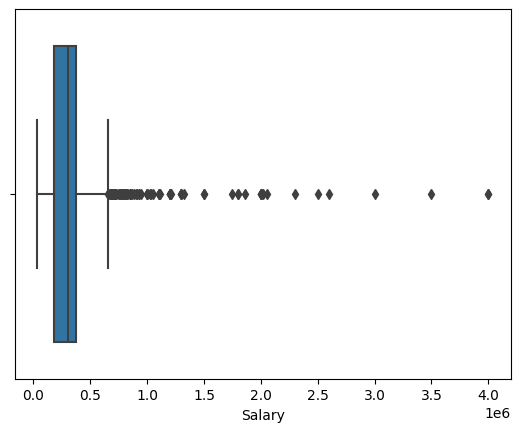

In [42]:
sns.boxplot(x=df['Salary'])

<Axes: ylabel='Density'>

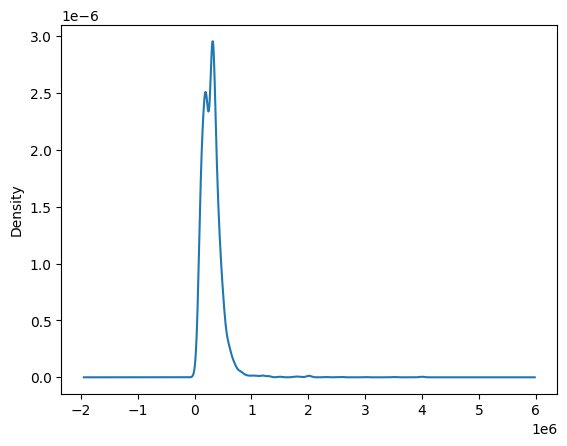

In [43]:
df['Salary'].plot(kind='kde')

### Personality test scores

<Axes: xlabel='openess_to_experience', ylabel='Density'>

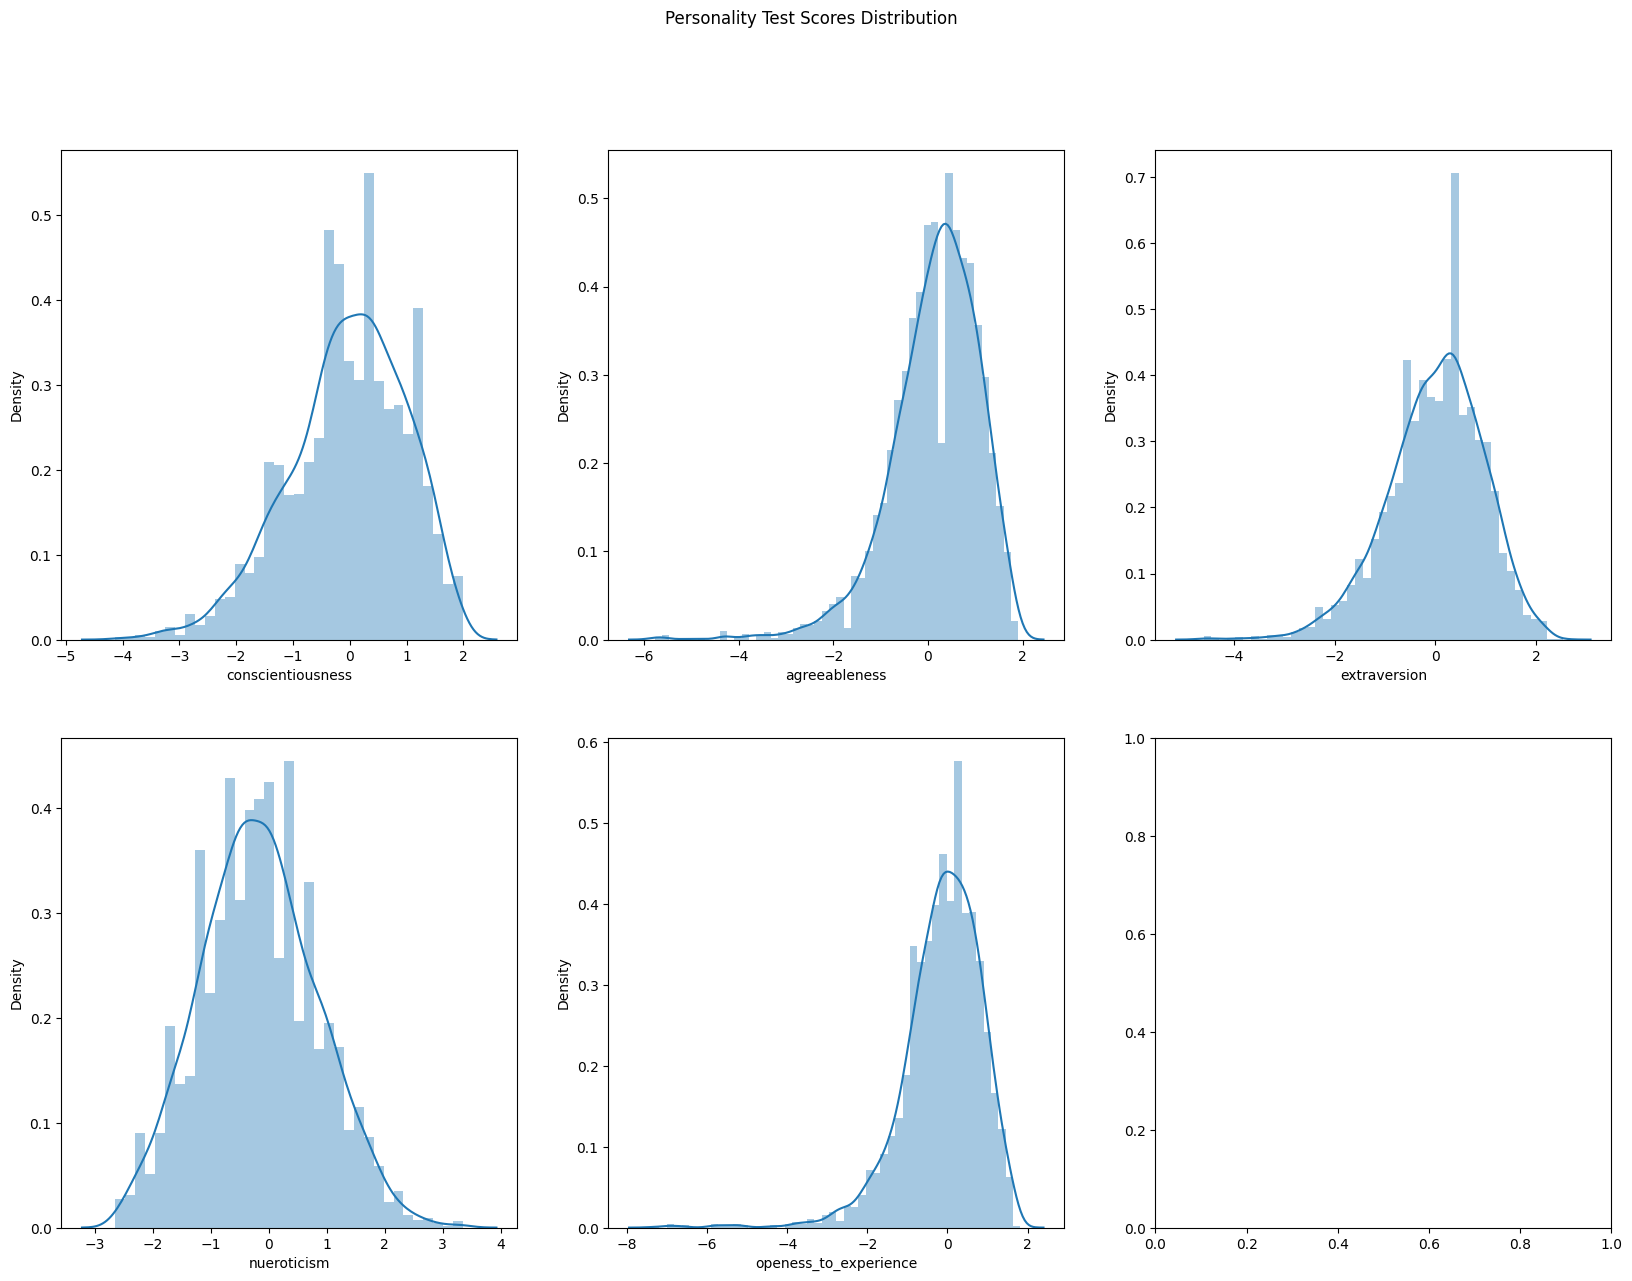

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
 
fig.suptitle('Personality Test Scores Distribution')

sns.distplot(ax=axes[0, 0],a=df['conscientiousness'])
sns.distplot(ax=axes[0, 1],a=df['agreeableness'])
sns.distplot(ax=axes[0, 2],a=df['extraversion'])
sns.distplot(ax=axes[1, 0],a=df['nueroticism'])
sns.distplot(ax=axes[1, 1],a=df['openess_to_experience'])

Insights:

1. Here we can see that the personality test scores are mostly left skewed which means most of the aspirants got high personality test scores.
2. We can see that Nueroticism scores follow normal distribution which implies that almost half of the aspirants struggle with emotional stability.

### Specialization

<Axes: xlabel='Specialization', ylabel='count'>

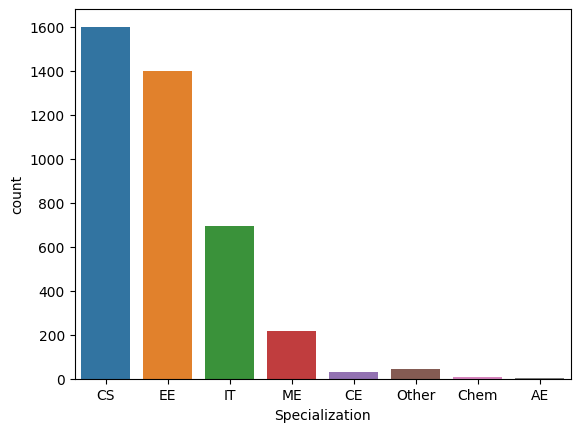

In [45]:
sns.countplot(x=df['Specialization'])

<Axes: xlabel='Specialization', ylabel='count'>

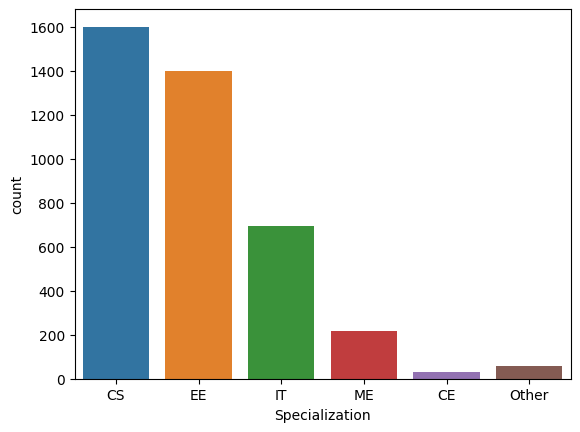

In [46]:
Domain_replace = {'Chem':'Other','AE':'Other'}
df['Specialization'].replace(Domain_replace,inplace=True)
sns.countplot(x=df['Specialization'])

Insights:

From this plot we can say that most of the aspirants are from CS and EE specializations.

<Axes: xlabel='Gender', ylabel='count'>

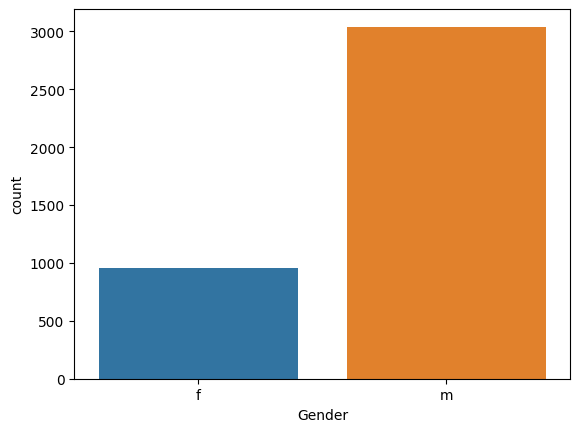

In [47]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='collegeGPA', ylabel='Density'>

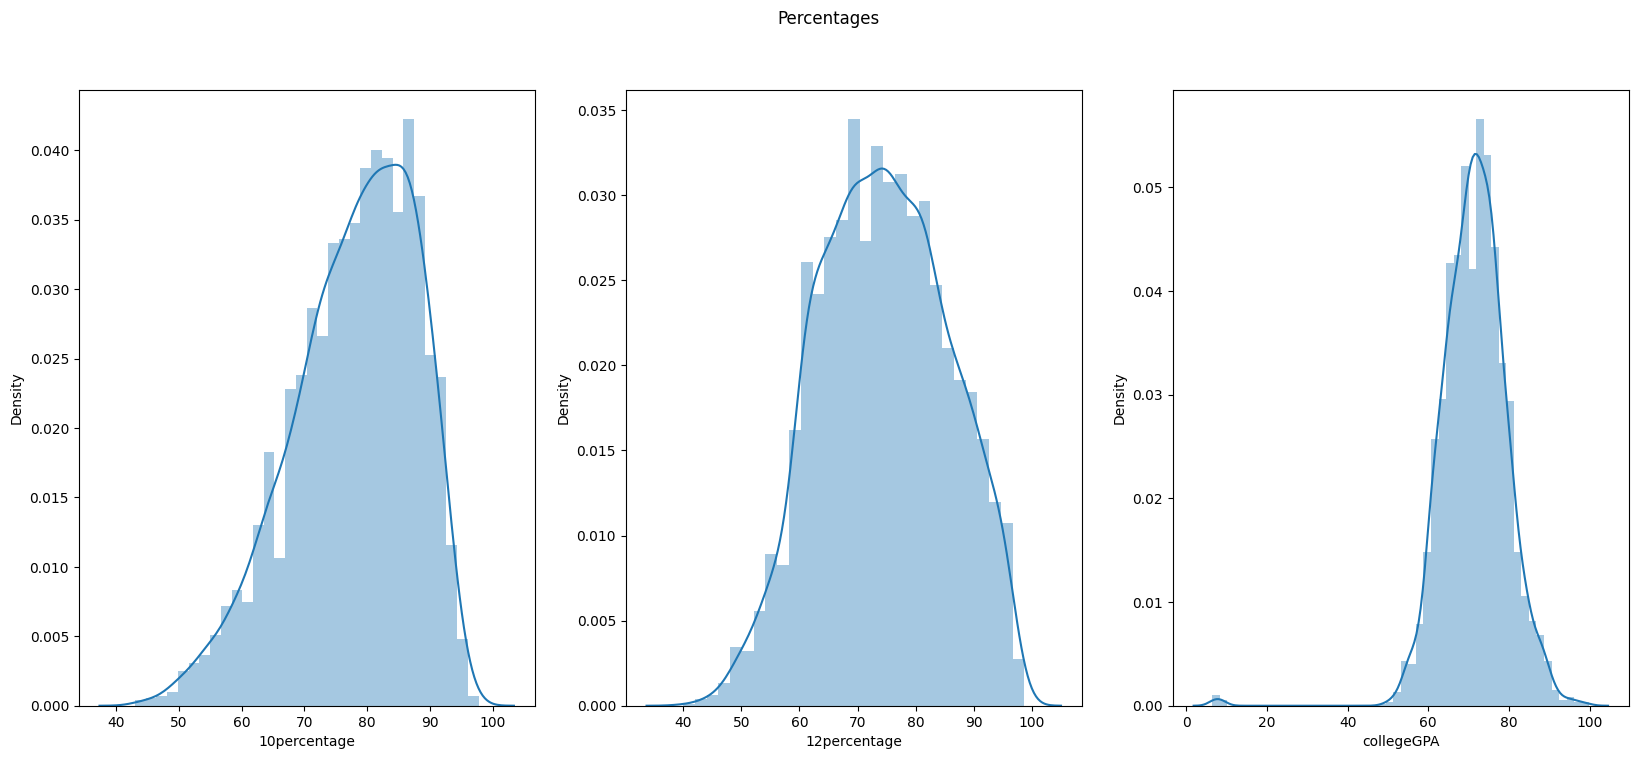

In [48]:
tenth = df['10percentage']
twelve = df['12percentage']
clg_gpa = df['collegeGPA']

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
 
fig.suptitle('Percentages')

sns.distplot(ax=axes[0],a=tenth)
sns.distplot(ax=axes[1],a=twelve)
sns.distplot(ax=axes[2],a=clg_gpa)

Insights:

Most of the aspirants got 50 to 100 percentages in 10th, 12th and College but there are some students who failed in college(i.e.below 20%)

In [49]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
0,203097,420000.0,2012-06-01,2024-10-04 10:07:37.124985,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,CS,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,148,34.0,STATE,Bangalore
1,579905,500000.0,2013-09-01,2024-10-04 10:07:37.124985,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,EE,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,133,35.0,CBSE,Indore
2,810601,325000.0,2014-06-01,2024-10-04 10:07:37.124985,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,124,32.0,CBSE,Chennai
3,267447,1100000.0,2011-07-01,2024-10-04 10:07:37.124985,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,159,34.0,CBSE,Gurgaon
4,343523,200000.0,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,EE,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,11,33.0,CBSE,Manesar


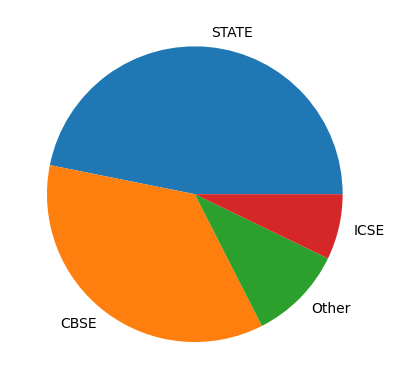

In [50]:
data = pd.DataFrame(df['XBoard'].value_counts())
plt.pie(data['count'], labels=data.index)
plt.show()

Insights:

Most of the students are from State and CBSE board in 10th class.

In [51]:
data.head()

,count
XBoard,
STATE,1873
CBSE,1425
Other,414
ICSE,286


<Axes: xlabel='CollegeTier', ylabel='count'>

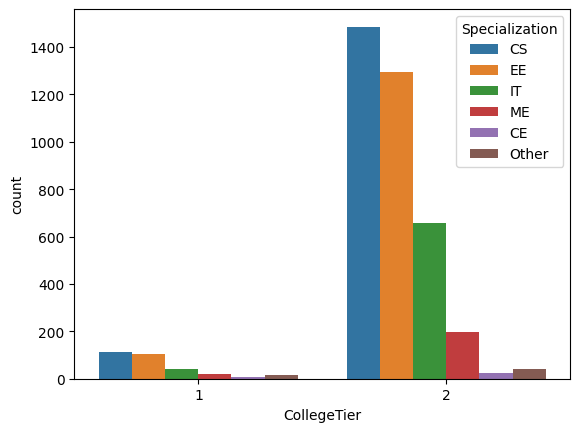

In [52]:
sns.countplot(x=df['CollegeTier'],hue=df['Specialization'])

In [53]:
popular_role = list(pd.DataFrame(df['Designation'].value_counts()).head(15).index)

In [54]:
popular_role

['software engineer',
 'software developer',
 'system engineer',
 'programmer analyst',
 'systems engineer',
 'java software engineer',
 'software test engineer',
 'project engineer',
 'technical support engineer',
 'senior software engineer',
 'java developer',
 'test engineer',
 'web developer',
 'application developer',
 'assistant manager']

In [55]:
temp = df[df['Designation'].isin(popular_role)]
temp

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
1,579905,500000.0,2013-09-01,2024-10-04 10:07:37.124985,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,EE,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,133,35.0,CBSE,Indore
2,810601,325000.0,2014-06-01,2024-10-04 10:07:37.124985,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721,124,32.0,CBSE,Chennai
3,267447,1100000.0,2011-07-01,2024-10-04 10:07:37.124985,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,159,34.0,CBSE,Gurgaon
5,1027655,300000.0,2014-06-01,2024-10-04 10:07:37.124985,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.00,state board,5086,2,B.Tech/B.E.,EE,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608,124,32.0,STATE,Hyderabad
6,947847,300000.0,2014-08-01,2015-05-01 00:00:00.000000,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,CS,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,8,31.0,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,358393,430000.0,2013-03-01,2024-10-04 10:07:37.124985,system engineer,Gurgaon,f,1990-05-14,90.40,cbse,2007,87.00,cbse,167,2,B.Tech/B.E.,CS,77.00,167,0,Haryana,2012,585,595,675,0.901490,545,-1,-1,-1,-1,-1,-1,0.2782,0.3448,0.0914,-1.1422,-0.6035,139,34.0,CBSE,Gurgaon
3986,51897,225000.0,2010-01-01,2010-10-01 00:00:00.000000,software test engineer,Bangalore,f,1986-02-28,84.93,maharashtra state board,2004,81.67,maharashtra state board,127,2,MCA,CS,74.73,127,0,Maharashtra,2010,515,545,545,0.819417,505,-1,-1,-1,-1,-1,-1,-0.1082,1.1248,1.9782,-1.9354,-1.0774,8,38.0,STATE,Bangalore
3989,1204604,300000.0,2014-09-01,2024-10-04 10:07:37.124985,software engineer,Bangalore,m,1991-11-23,74.88,state board,2010,82.55,state board,3572,2,B.Tech/B.E.,CS,80.00,3572,0,Karnataka,2014,500,480,500,0.356536,465,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.0333,0.6721,121,32.0,STATE,Bangalore
3993,47916,280000.0,2011-10-01,2012-10-01 00:00:00.000000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,IT,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.6498,-0.9194,12,37.0,CBSE,Delhi


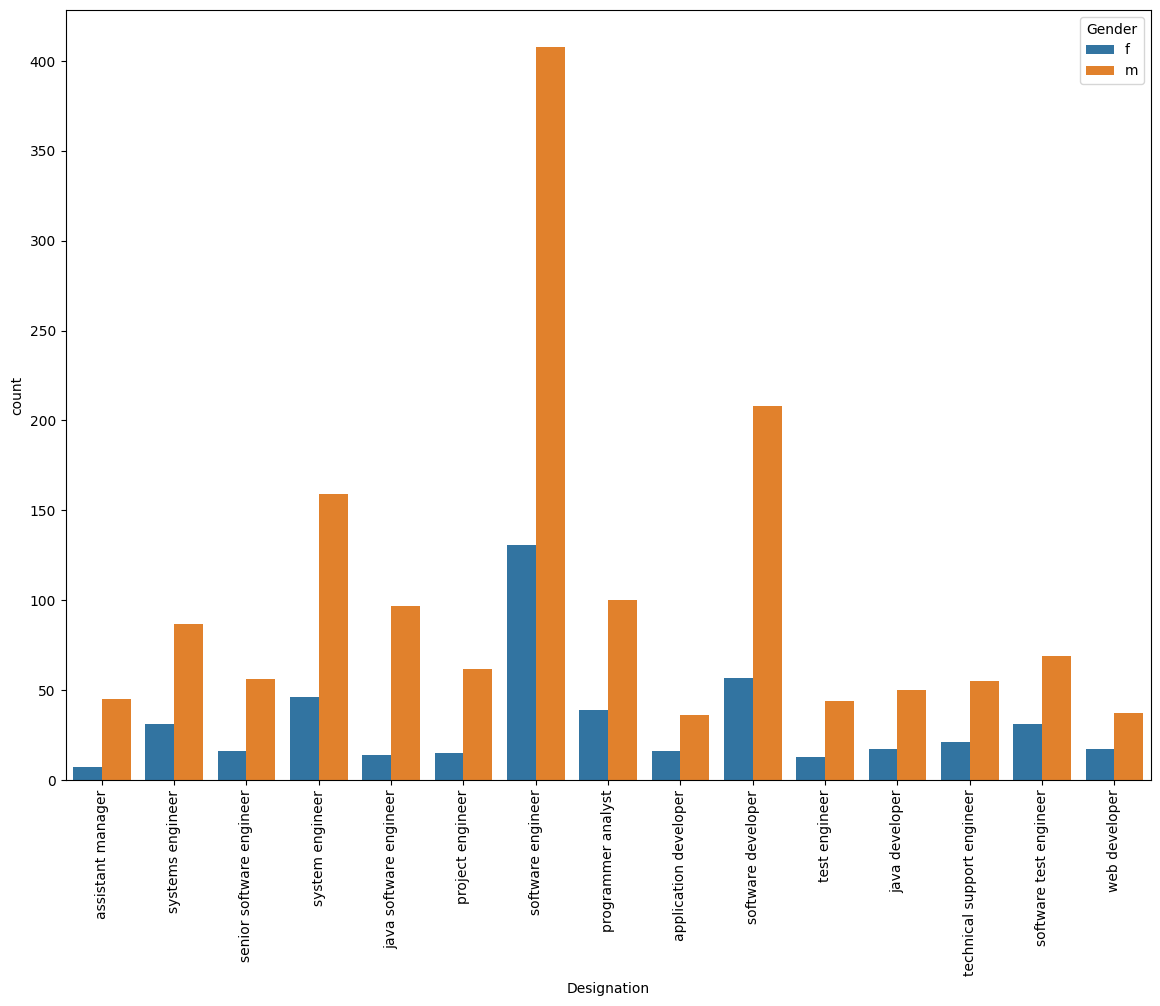

In [56]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

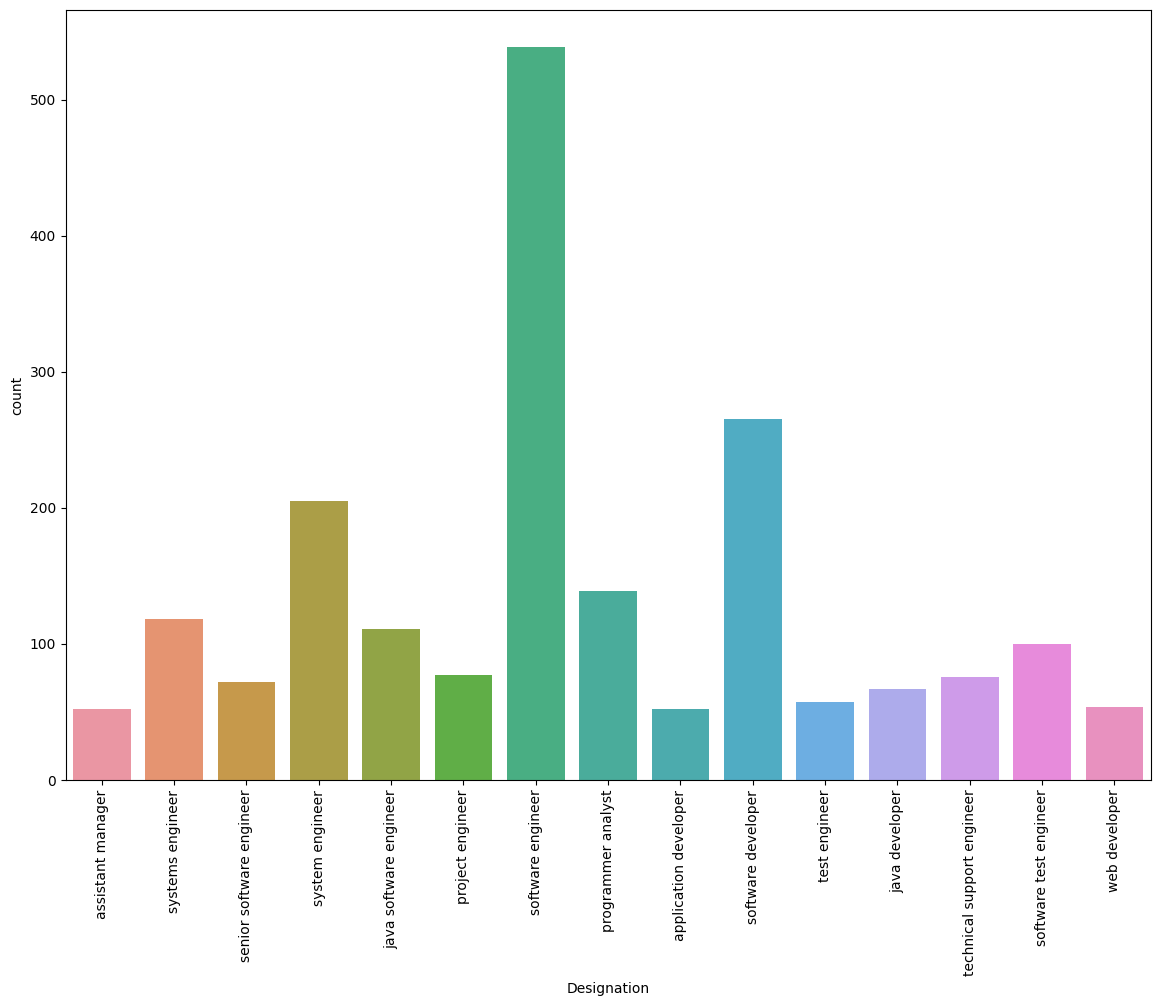

In [57]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'])
plt.xticks(rotation=90)
plt.show()

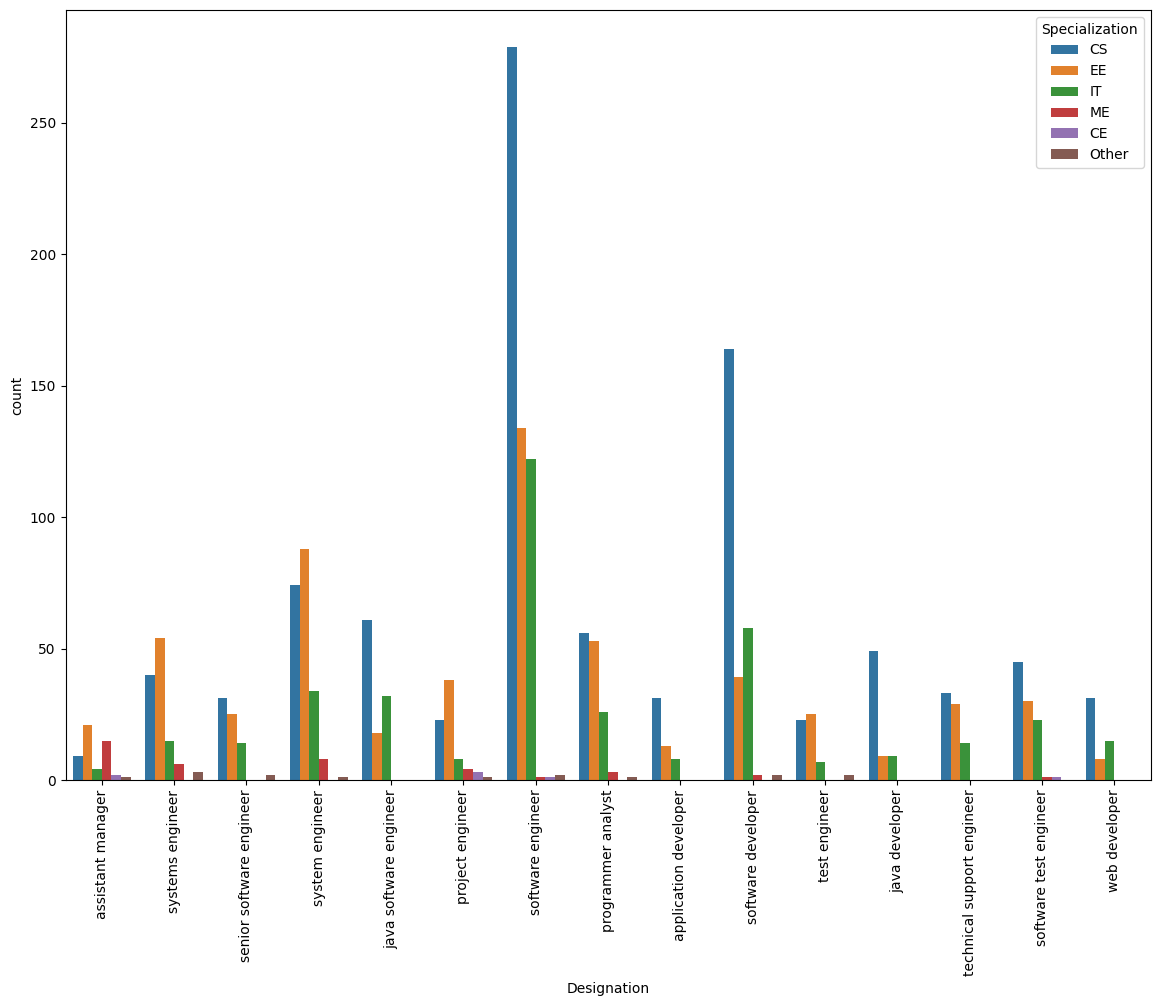

In [58]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'],hue=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [59]:
popular_city = list(pd.DataFrame(df['JobCities'].value_counts()).head(15).index)

In [60]:
popular_city

temp_1 = df[df['JobCities'].isin(popular_city)]
temp_1

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
0,203097,420000.0,2012-06-01,2024-10-04 10:07:37.124985,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,CS,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,148,34.0,STATE,Bangalore
2,810601,325000.0,2014-06-01,2024-10-04 10:07:37.124985,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,124,32.0,CBSE,Chennai
3,267447,1100000.0,2011-07-01,2024-10-04 10:07:37.124985,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,159,34.0,CBSE,Gurgaon
5,1027655,300000.0,2014-06-01,2024-10-04 10:07:37.124985,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.00,state board,5086,2,B.Tech/B.E.,EE,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,124,32.0,STATE,Hyderabad
6,947847,300000.0,2014-08-01,2015-05-01 00:00:00.000000,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,CS,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,8,31.0,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01 00:00:00.000000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,IT,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,12,37.0,CBSE,Delhi
3994,752781,100000.0,2013-07-01,2013-07-01 00:00:00.000000,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,EE,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,32.0,STATE,Hyderabad
3995,355888,320000.0,2013-07-01,2024-10-04 10:07:37.124985,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,CS,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,135,33.0,STATE,Bangalore
3996,947111,200000.0,2014-07-01,2015-01-01 00:00:00.000000,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,CS,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,6,32.0,STATE,Bangalore


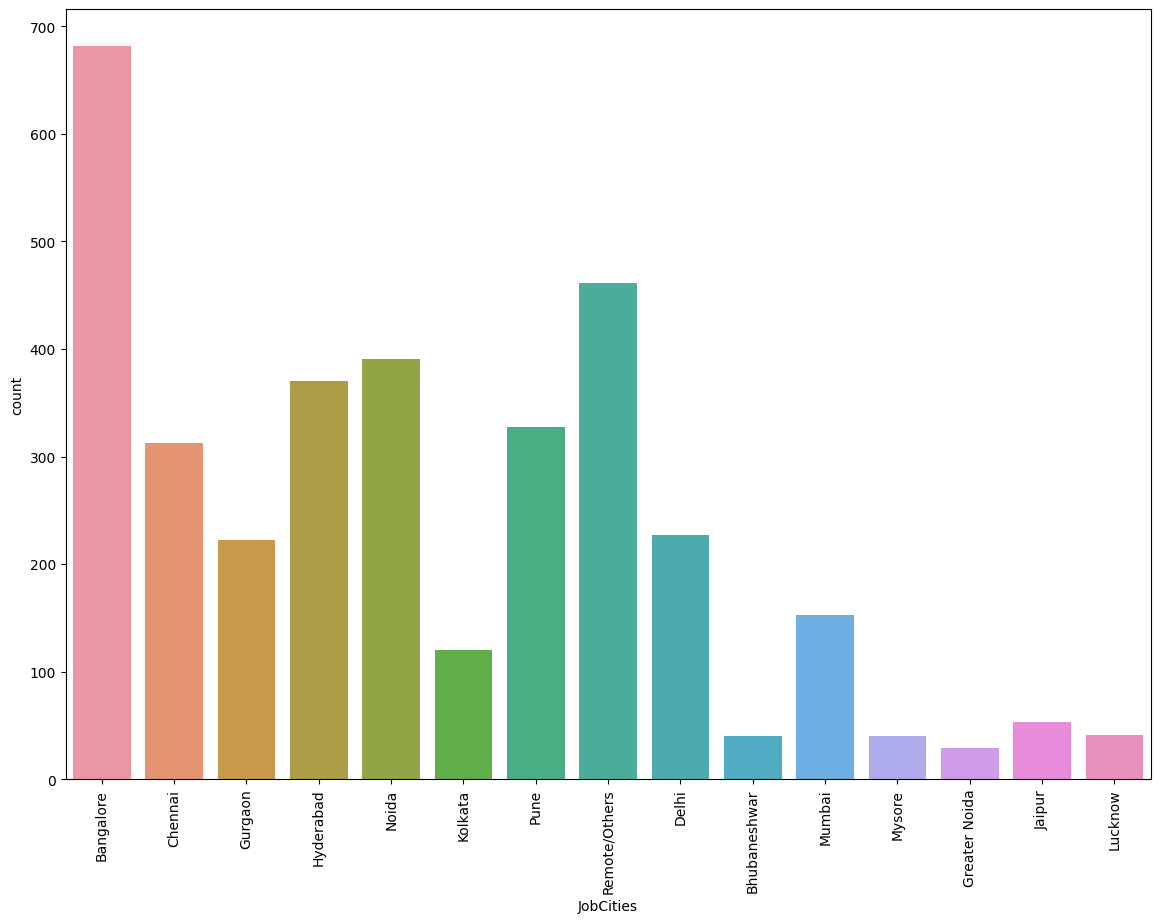

In [61]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'])
plt.xticks(rotation=90)
plt.show()

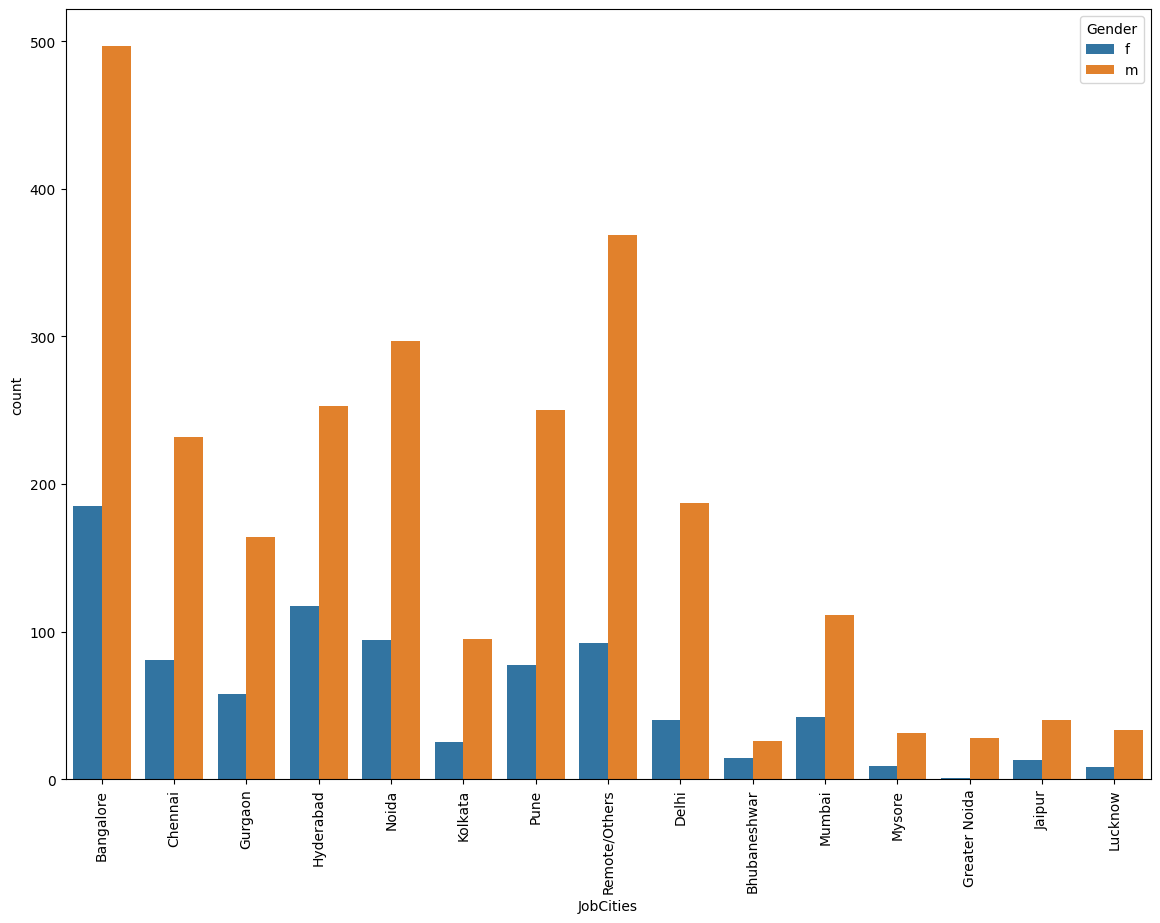

In [62]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

# Bivariant Analysis

<Axes: xlabel='Salary', ylabel='Gender'>

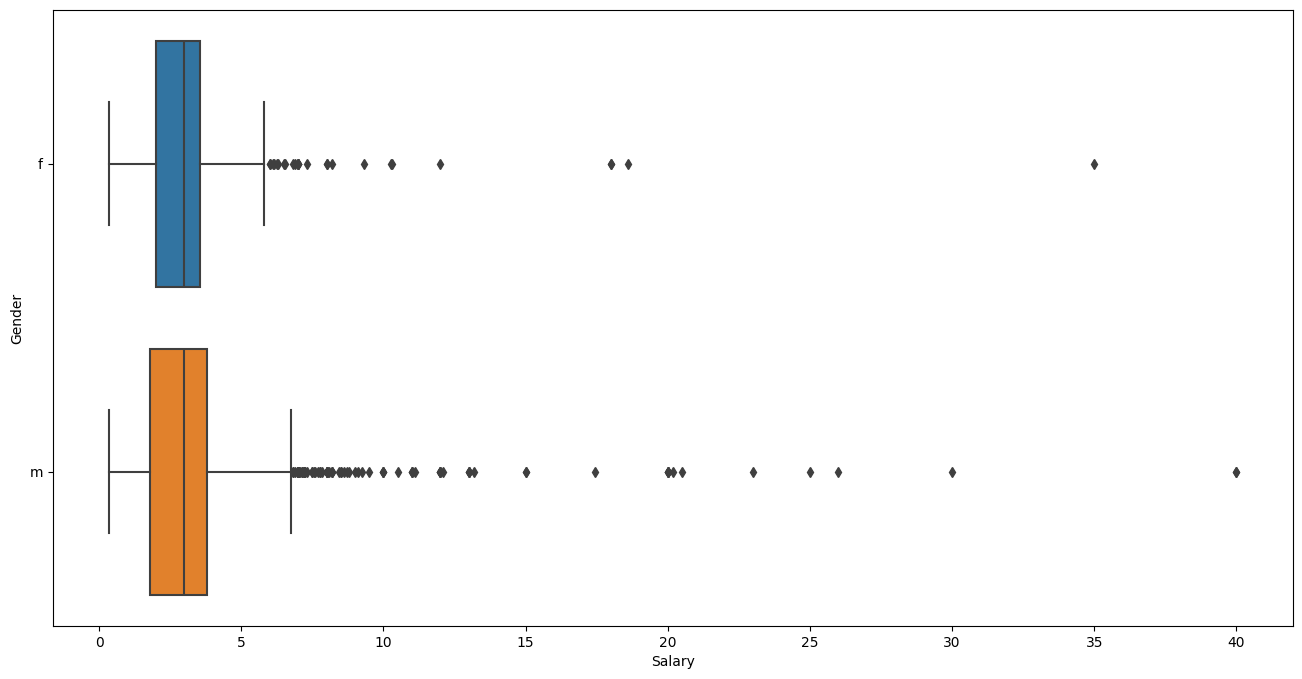

In [63]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['Salary']/100000, y=df['Gender'])

Insights:

1. The median salary of both Males and Females is almost similar.
2. The maximum salary of the males category exceeds the maximum salary of female category.
3. The Highest salary is nearly 40LPA.

In [64]:
temp_data = pd.DataFrame(df[df['Tenure']>=0])
temp_data.shape

(3959, 42)

In [65]:
temp_data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
0,203097,420000.0,2012-06-01,2024-10-04 10:07:37.124985,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,CS,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,148,34.0,STATE,Bangalore
1,579905,500000.0,2013-09-01,2024-10-04 10:07:37.124985,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,EE,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,133,35.0,CBSE,Indore
2,810601,325000.0,2014-06-01,2024-10-04 10:07:37.124985,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,124,32.0,CBSE,Chennai
3,267447,1100000.0,2011-07-01,2024-10-04 10:07:37.124985,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,159,34.0,CBSE,Gurgaon
4,343523,200000.0,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,EE,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,11,33.0,CBSE,Manesar


<Axes: xlabel='Tenure', ylabel='Salary'>

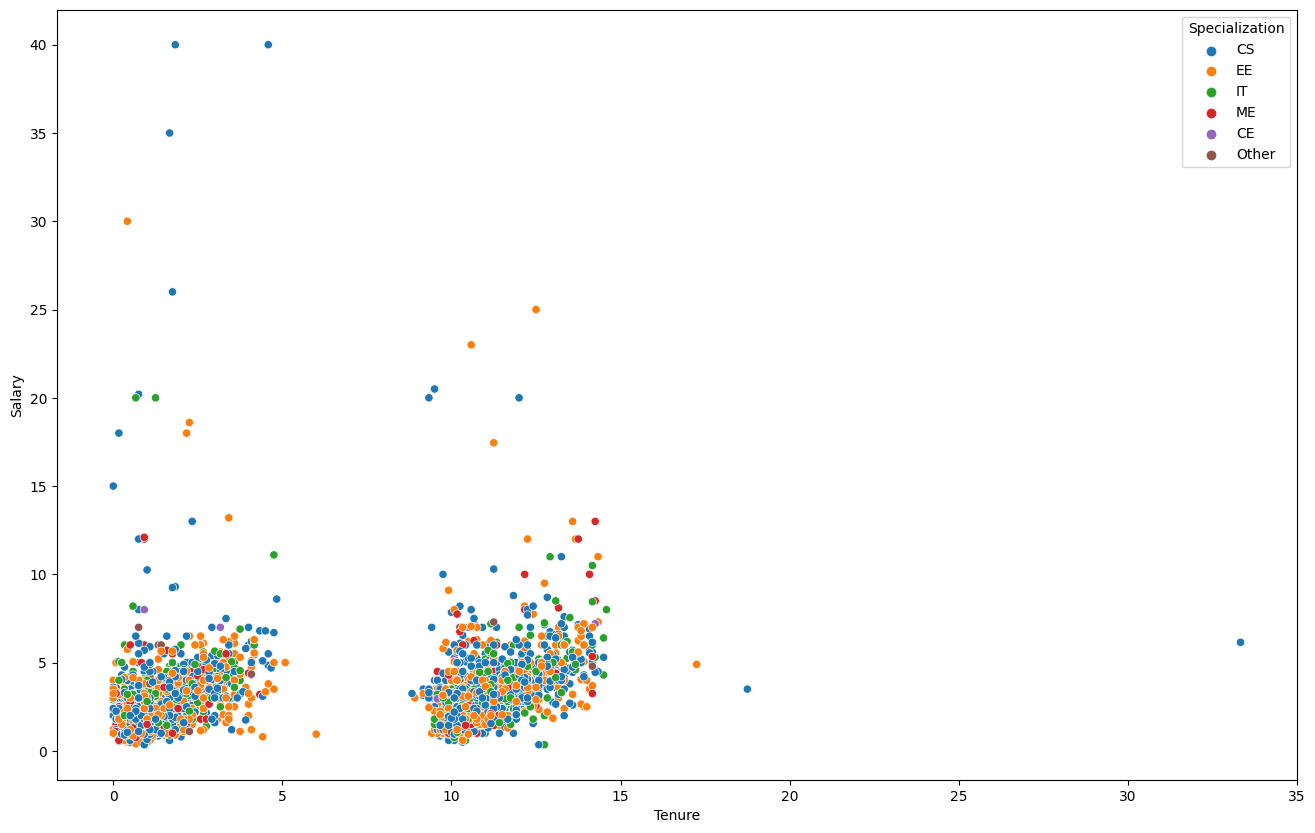

In [66]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=temp_data['Tenure']/12,y=temp_data['Salary']/100000,hue=temp_data['Specialization'])

Insights:

1. We can see that the period of tenure doesn't impact the Salary.
2. People with higher salaries have experience less that 5 years.
3. The CS Specialization has the highest salary packages.

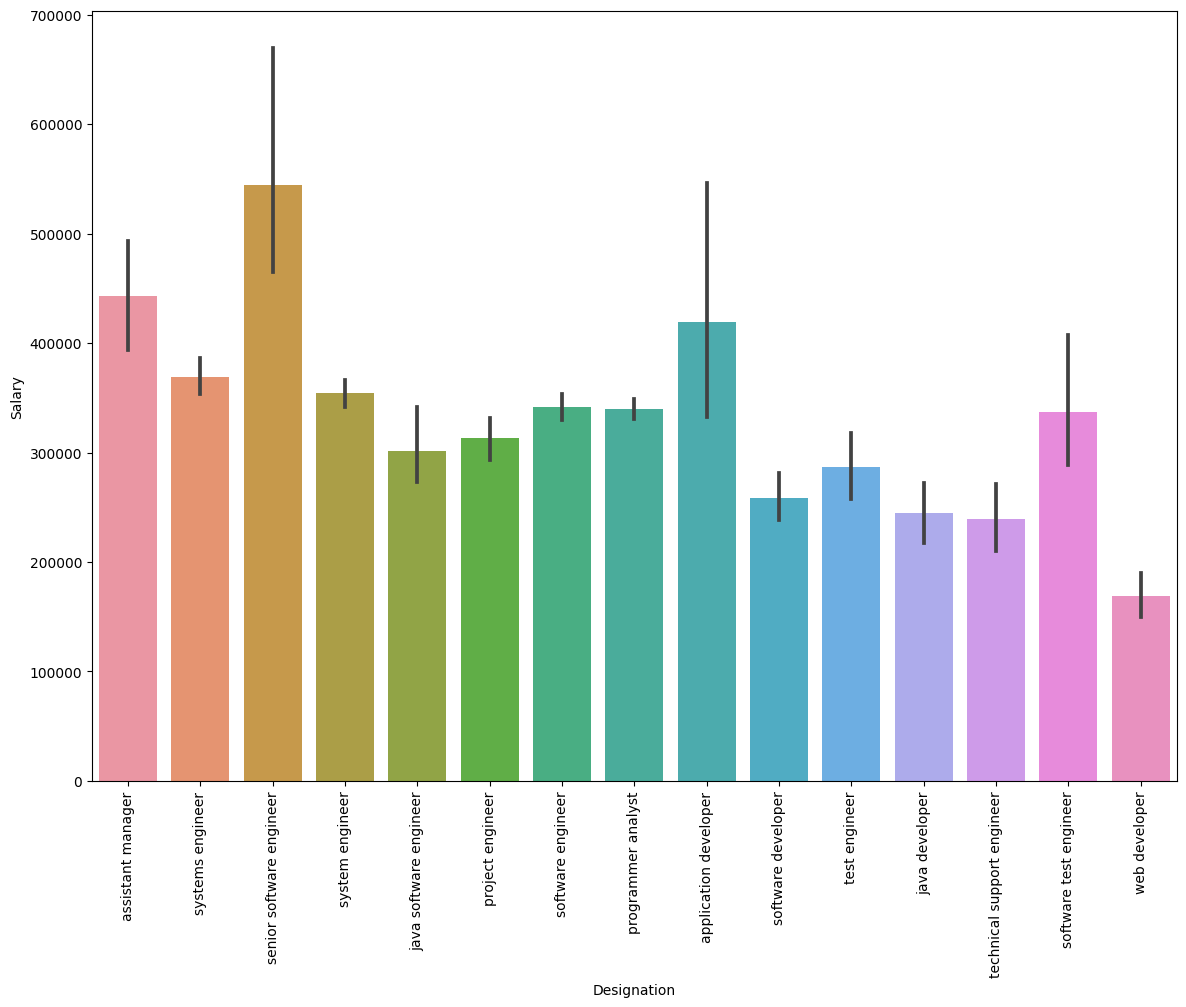

In [67]:
plt.figure(figsize=(14,10))
sns.barplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'],y=df['Salary'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Specialization', ylabel='Salary'>

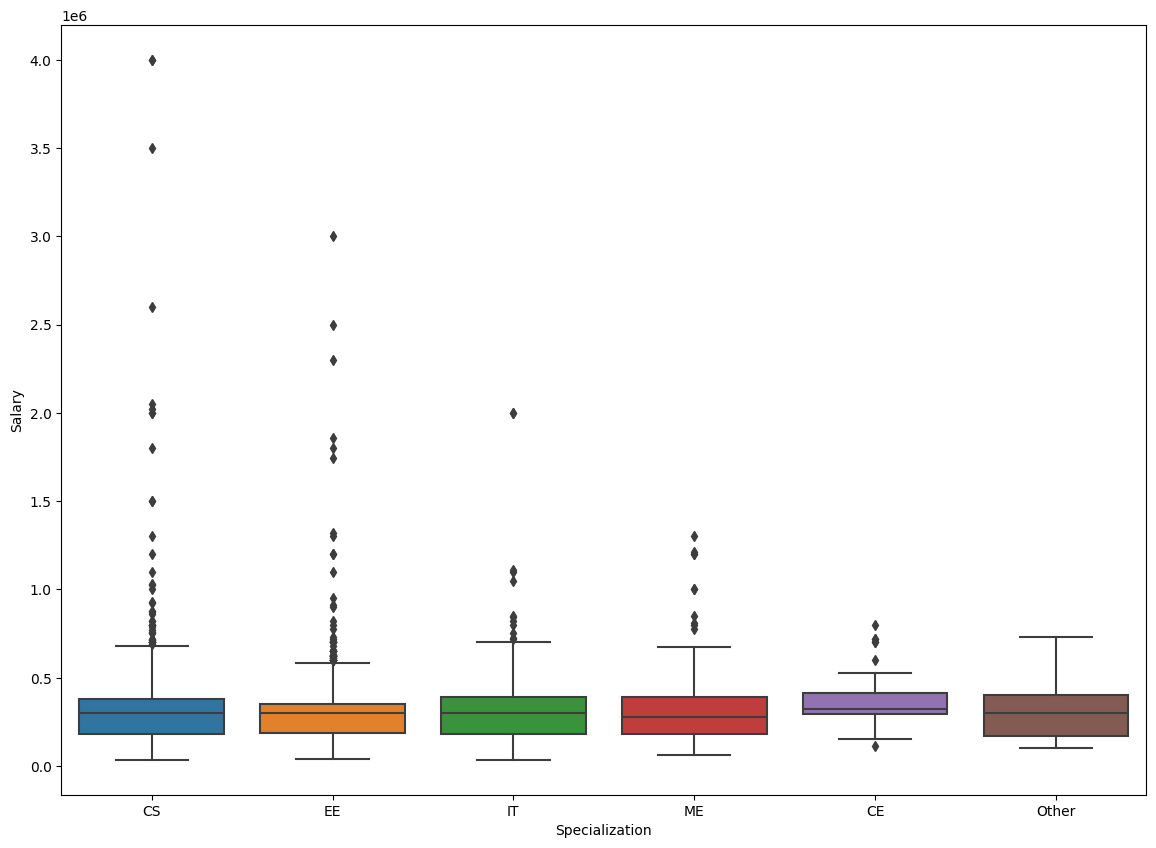

In [68]:
plt.figure(figsize=(14,10))
sns.boxplot(x=df['Specialization'], y=df['Salary'])

Insights:

1. The median salary of CS, EE, IT, ME, and other categories are almost similar.
2. The salary packages of CE specialization are low compared to CS, EE, IT and ME categories.
3. Salaries of CS and IT are almost same.

<Axes: xlabel='Specialization', ylabel='count'>

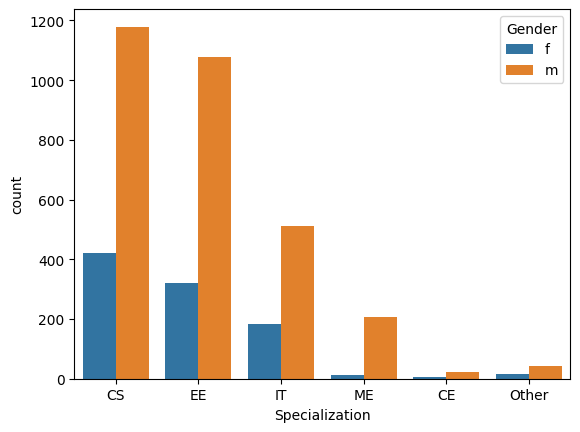

In [69]:
sns.countplot(x=df['Specialization'], hue=df['Gender'])

Insights:

1. The female aspirants are less than half of male aspirants in each specialization.
2. ME and CE branches has the least number of female aspirants.

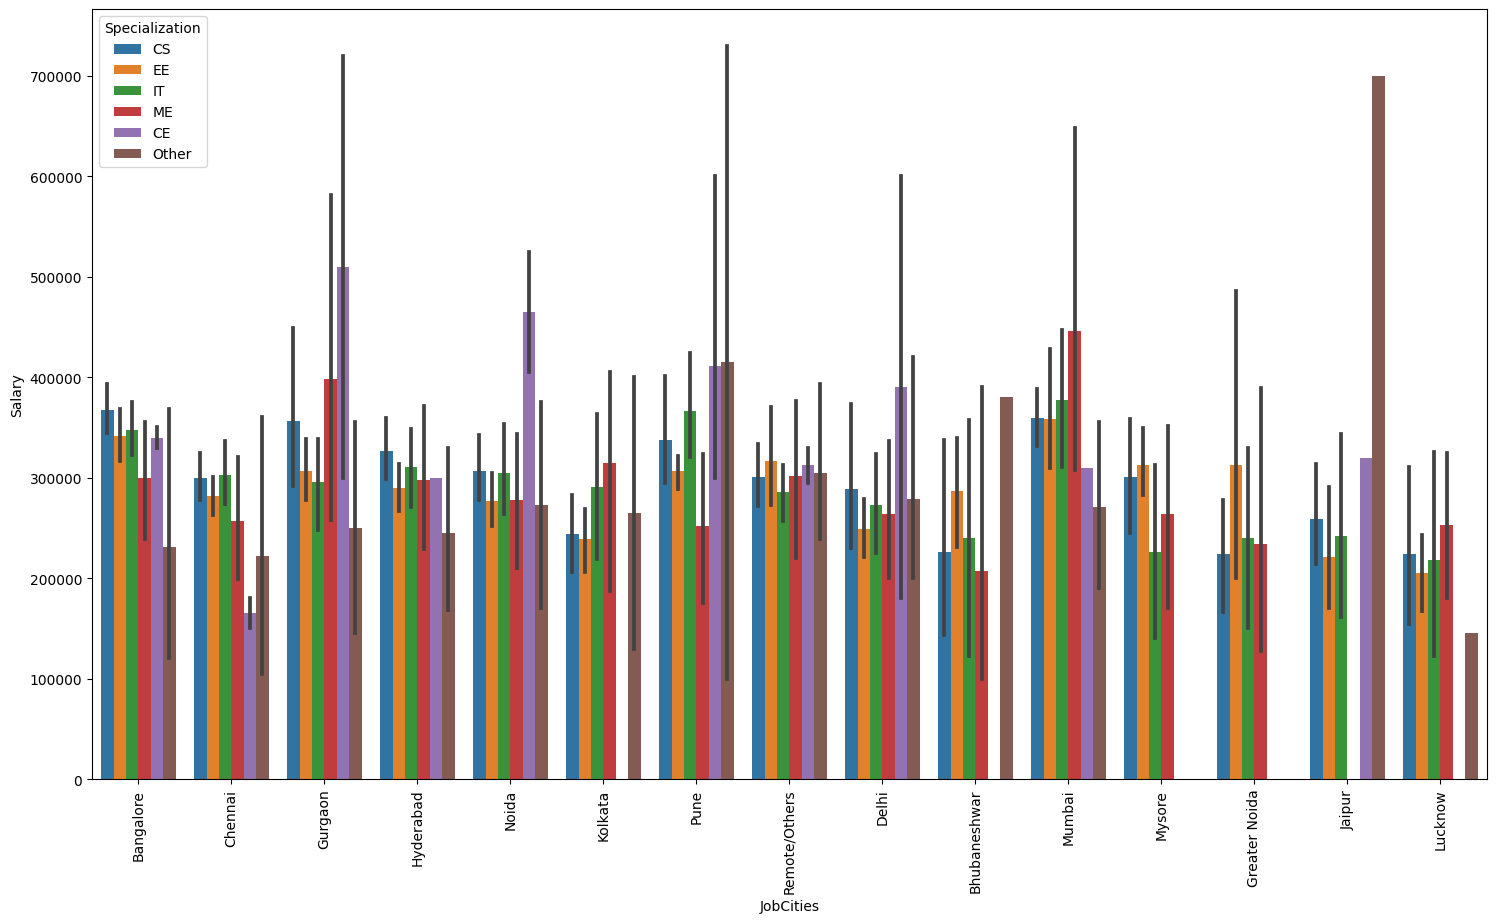

In [70]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'], y=df['Salary'], hue=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

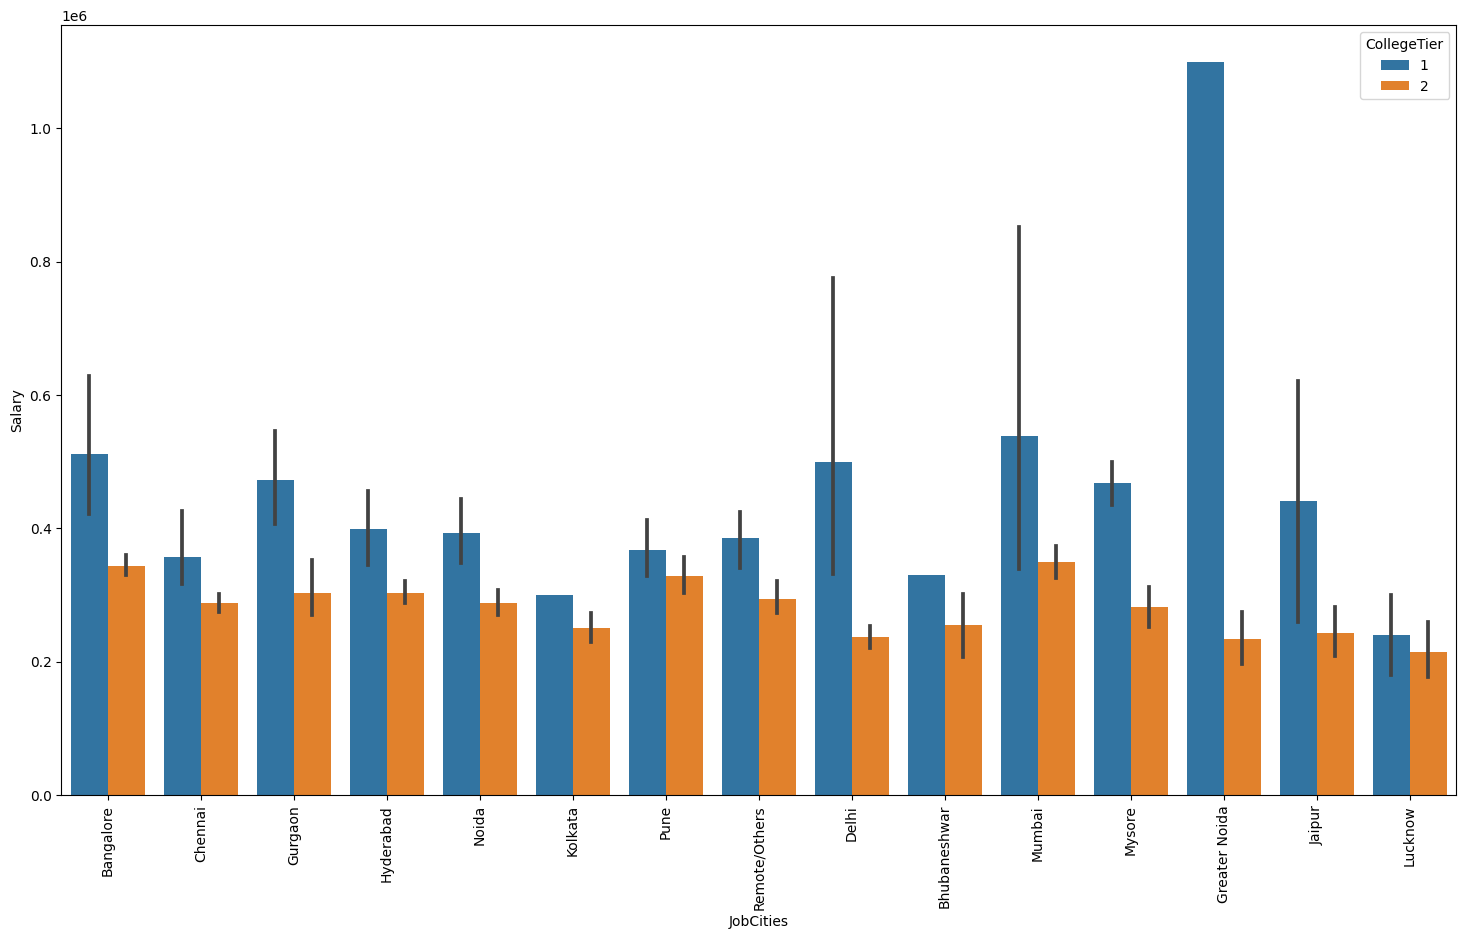

In [71]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=df['Salary'],hue=df['CollegeTier'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gender', ylabel='Salary'>

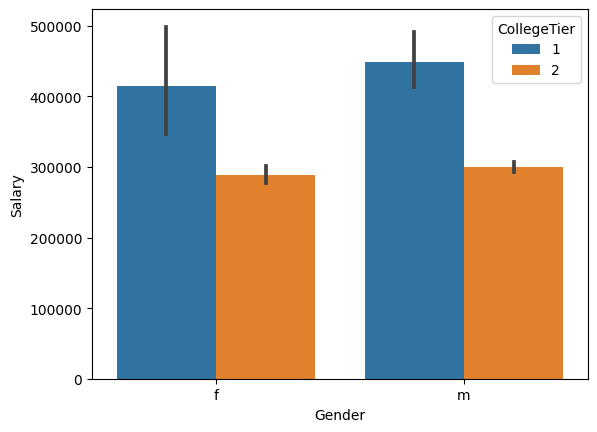

In [72]:
sns.barplot(x=df['Gender'],y=df['Salary'],hue=df['CollegeTier'])

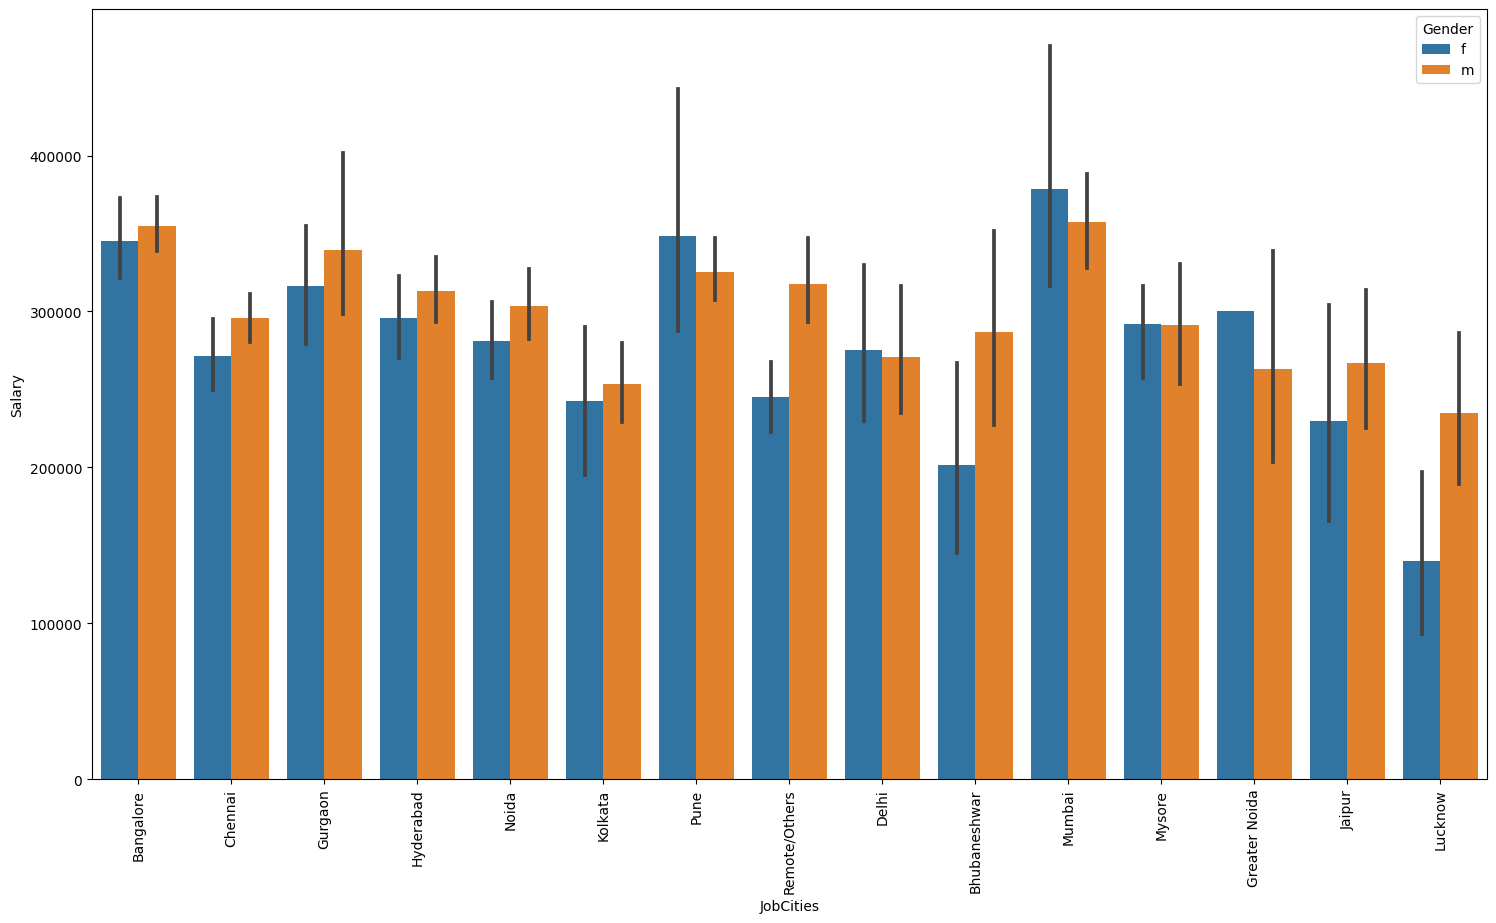

In [73]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=df['Salary'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

# Research Questions

In [74]:
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import t, ttest_ind
import matplotlib.pyplot as plt

In [75]:
df['Designation'].value_counts()

Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64

In [76]:
designation_mapping = {
    'Software Engg': 'Software Engineer',
    'Engineer-Hws': 'Hardware Engineer',

}

In [77]:
df['Designation'] = df['Designation'].replace(designation_mapping)

In [78]:
print(df['Designation'].value_counts())

Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64


In [79]:
df['Designation'] = df['Designation'].str.title()
df['Designation'].unique()

array(['Senior Quality Engineer', 'Assistant Manager', 'Systems Engineer',
       'Senior Software Engineer', 'Get', 'System Engineer',
       'Java Software Engineer', 'Mechanical Engineer',
       'Electrical Engineer', 'Project Engineer', 'Senior Php Developer',
       'Senior Systems Engineer', 'Quality Assurance Engineer',
       'Qa Analyst', 'Network Engineer', 'Product Development Engineer',
       'Associate Software Developer', 'Data Entry Operator',
       'Software Engineer', 'Developer', 'Electrical Project Engineer',
       'Programmer Analyst', 'Systems Analyst', 'Ase',
       'Telecommunication Engineer', 'Application Developer',
       'Ios Developer', 'Executive Assistant', 'Online Marketing Manager',
       'Documentation Specialist', 'Associate Software Engineer',
       'Management Trainee', 'Site Manager', 'Software Developer',
       '.Net Developer', 'Production Engineer', 'Jr. Software Engineer',
       'Trainee Software Developer', 'Ui Developer',
       'Assi

In [80]:
roles_of_interest = ['Programmer Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
filtered_data = df[(df['Degree'] == 'B.Tech/B.E.') & (df['Designation'].isin(roles_of_interest))]
filtered_data

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
19,466888,325000.0,2014-09-01,2024-10-04 10:07:37.124985,Software Engineer,Pune,f,1990-11-30,79.00,cbse,2008,62.20,cbse,7977,2,B.Tech/B.E.,CS,76.30,7977,0,Uttar Pradesh,2012,485,445,435,0.864685,525,-1,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295,121,33.0,CBSE,Pune
20,140069,320000.0,2010-11-01,2012-09-01 00:00:00.000000,Software Engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,2006,84.63,karnataka pre university board,4437,2,B.Tech/B.E.,CS,78.15,4437,0,Karnataka,2010,455,535,445,0.635979,445,-1,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444,22,36.0,STATE,Bangalore
21,339689,200000.0,2012-08-01,2013-12-01 00:00:00.000000,Software Engineer,Remote/Others,f,1991-08-20,75.67,up,2007,74.40,up,11368,2,B.Tech/B.E.,IT,74.01,11368,0,Uttar Pradesh,2012,385,555,445,0.635979,445,-1,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,16,33.0,STATE,Remote/Others
24,963123,335000.0,2014-06-01,2015-06-01 00:00:00.000000,Programmer Analyst,Hyderabad,m,1993-06-28,88.00,state board,2010,90.00,state board,9173,2,B.Tech/B.E.,CS,76.00,9173,1,Telangana,2014,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692,11,31.0,STATE,Hyderabad
31,1094324,340000.0,2014-08-01,2015-04-01 00:00:00.000000,Software Engineer,Bangalore,m,1992-10-23,77.20,state board,2010,86.10,state board,7282,2,B.Tech/B.E.,CS,71.00,7282,0,Tamil Nadu,2014,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,7,31.0,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1274658,320000.0,2013-08-01,2014-01-01 00:00:00.000000,Software Engineer,Hyderabad,f,1991-04-24,89.70,icse,2009,86.70,icse,7685,2,B.Tech/B.E.,IT,80.00,7685,1,West Bengal,2013,720,675,570,-1.000000,-1,-1,-1,-1,-1,-1,-1,0.2718,1.2114,0.4711,-0.10760,0.8637,5,33.0,ICSE,Hyderabad
3981,1077872,220000.0,2014-09-01,2024-10-04 10:07:37.124985,Software Engineer,Gurgaon,m,1991-12-17,53.40,cbse,2009,65.40,cbse,3879,2,B.Tech/B.E.,CS,71.20,3879,0,Madhya Pradesh,2013,560,420,645,0.953900,575,-1,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386,121,32.0,CBSE,Gurgaon
3984,305041,480000.0,2011-12-01,2024-10-04 10:07:37.124985,Software Engineer,Gurgaon,f,1990-01-18,89.80,cbse,2007,83.80,cbse,5232,2,B.Tech/B.E.,CS,70.00,5232,0,Haryana,2011,535,455,525,0.843124,515,-1,-1,-1,-1,-1,-1,-0.2628,0.1888,0.3817,-0.29020,1.6082,154,34.0,CBSE,Gurgaon
3989,1204604,300000.0,2014-09-01,2024-10-04 10:07:37.124985,Software Engineer,Bangalore,m,1991-11-23,74.88,state board,2010,82.55,state board,3572,2,B.Tech/B.E.,CS,80.00,3572,0,Karnataka,2014,500,480,500,0.356536,465,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721,121,32.0,STATE,Bangalore


In [81]:
df[(df['Designation'].isin(roles_of_interest))]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
19,466888,325000.0,2014-09-01,2024-10-04 10:07:37.124985,Software Engineer,Pune,f,1990-11-30,79.00,cbse,2008,62.20,cbse,7977,2,B.Tech/B.E.,CS,76.30,7977,0,Uttar Pradesh,2012,485,445,435,0.864685,525,-1,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295,121,33.0,CBSE,Pune
20,140069,320000.0,2010-11-01,2012-09-01 00:00:00.000000,Software Engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,2006,84.63,karnataka pre university board,4437,2,B.Tech/B.E.,CS,78.15,4437,0,Karnataka,2010,455,535,445,0.635979,445,-1,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444,22,36.0,STATE,Bangalore
21,339689,200000.0,2012-08-01,2013-12-01 00:00:00.000000,Software Engineer,Remote/Others,f,1991-08-20,75.67,up,2007,74.40,up,11368,2,B.Tech/B.E.,IT,74.01,11368,0,Uttar Pradesh,2012,385,555,445,0.635979,445,-1,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,16,33.0,STATE,Remote/Others
24,963123,335000.0,2014-06-01,2015-06-01 00:00:00.000000,Programmer Analyst,Hyderabad,m,1993-06-28,88.00,state board,2010,90.00,state board,9173,2,B.Tech/B.E.,CS,76.00,9173,1,Telangana,2014,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692,11,31.0,STATE,Hyderabad
31,1094324,340000.0,2014-08-01,2015-04-01 00:00:00.000000,Software Engineer,Bangalore,m,1992-10-23,77.20,state board,2010,86.10,state board,7282,2,B.Tech/B.E.,CS,71.00,7282,0,Tamil Nadu,2014,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,7,31.0,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,212055,550000.0,2013-07-01,2014-04-01 00:00:00.000000,Software Engineer,Bangalore,m,1989-07-22,69.16,up board,2006,65.66,up board,278,1,M.Tech./M.E.,CS,77.50,278,0,Uttar Pradesh,2013,395,435,645,0.990009,655,-1,-1,-1,-1,-1,-1,-0.5719,0.5008,-0.4891,0.41480,-1.2354,9,35.0,STATE,Bangalore
3981,1077872,220000.0,2014-09-01,2024-10-04 10:07:37.124985,Software Engineer,Gurgaon,m,1991-12-17,53.40,cbse,2009,65.40,cbse,3879,2,B.Tech/B.E.,CS,71.20,3879,0,Madhya Pradesh,2013,560,420,645,0.953900,575,-1,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386,121,32.0,CBSE,Gurgaon
3984,305041,480000.0,2011-12-01,2024-10-04 10:07:37.124985,Software Engineer,Gurgaon,f,1990-01-18,89.80,cbse,2007,83.80,cbse,5232,2,B.Tech/B.E.,CS,70.00,5232,0,Haryana,2011,535,455,525,0.843124,515,-1,-1,-1,-1,-1,-1,-0.2628,0.1888,0.3817,-0.29020,1.6082,154,34.0,CBSE,Gurgaon
3989,1204604,300000.0,2014-09-01,2024-10-04 10:07:37.124985,Software Engineer,Bangalore,m,1991-11-23,74.88,state board,2010,82.55,state board,3572,2,B.Tech/B.E.,CS,80.00,3572,0,Karnataka,2014,500,480,500,0.356536,465,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721,121,32.0,STATE,Bangalore


In [82]:
stats_results = filtered_data.groupby('Designation')['Salary'].describe()
stats_results

,count,mean,std,min,25%,50%,75%,max
Designation,,,,,,,,
Associate Engineer,5.0,332000.000000,120654.465313,180000.0,300000.0,315000.0,350000.0,515000.0
Hardware Engineer,8.0,281250.000000,128473.176745,105000.0,175000.0,277500.0,400000.0,450000.0
Programmer Analyst,134.0,339589.552239,60318.853608,90000.0,305000.0,335000.0,350000.0,640000.0
Software Engineer,502.0,339711.155378,141586.978533,60000.0,265000.0,325000.0,400000.0,1500000.0


#### Question-1 : Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

In [83]:
selected_designations = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
selected_data = df[df['Designation'].isin(selected_designations)]['Salary']

# Set the claimed salary range
claimed_salary_range = (250000, 300000)

# Perform t-test
t_statistic, p_value = ttest_ind(selected_data, [claimed_salary_range[0]] * len(selected_data))

# Set significance level
alpha = 0.05

print(t_statistic)
print(p_value)
# Compare p-value to significance level
if p_value < alpha:
    print("Reject the null hypothesis. Average salary is significantly greater than the claimed range.")
else:
    print("Fail to reject the null hypothesis. Average salary is equal to or less than the claimed range.")

14.622985534577333
2.1354126067620833e-44
Reject the null hypothesis. Average salary is significantly greater than the claimed range.


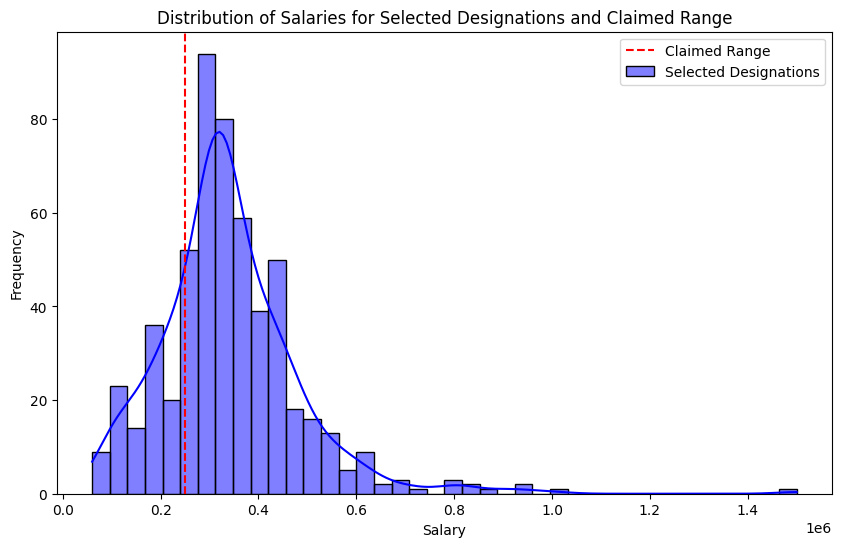

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(selected_data, kde=True, color='blue', label='Selected Designations')
plt.axvline(x=claimed_salary_range[0], color='red', linestyle='--', label='Claimed Range')

# Set plot labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries for Selected Designations and Claimed Range')

# Display legend
plt.legend()

#### Question-2 : Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [85]:
# Exploring the Relationship between Gender and Specialization
gender_specialization = pd.crosstab(df['Gender'], df['Specialization'])
gender_specialization

Specialization,CE,CS,EE,IT,ME,Other
Gender,,,,,,
f,6,420,320,184,12,15
m,23,1179,1079,511,207,42


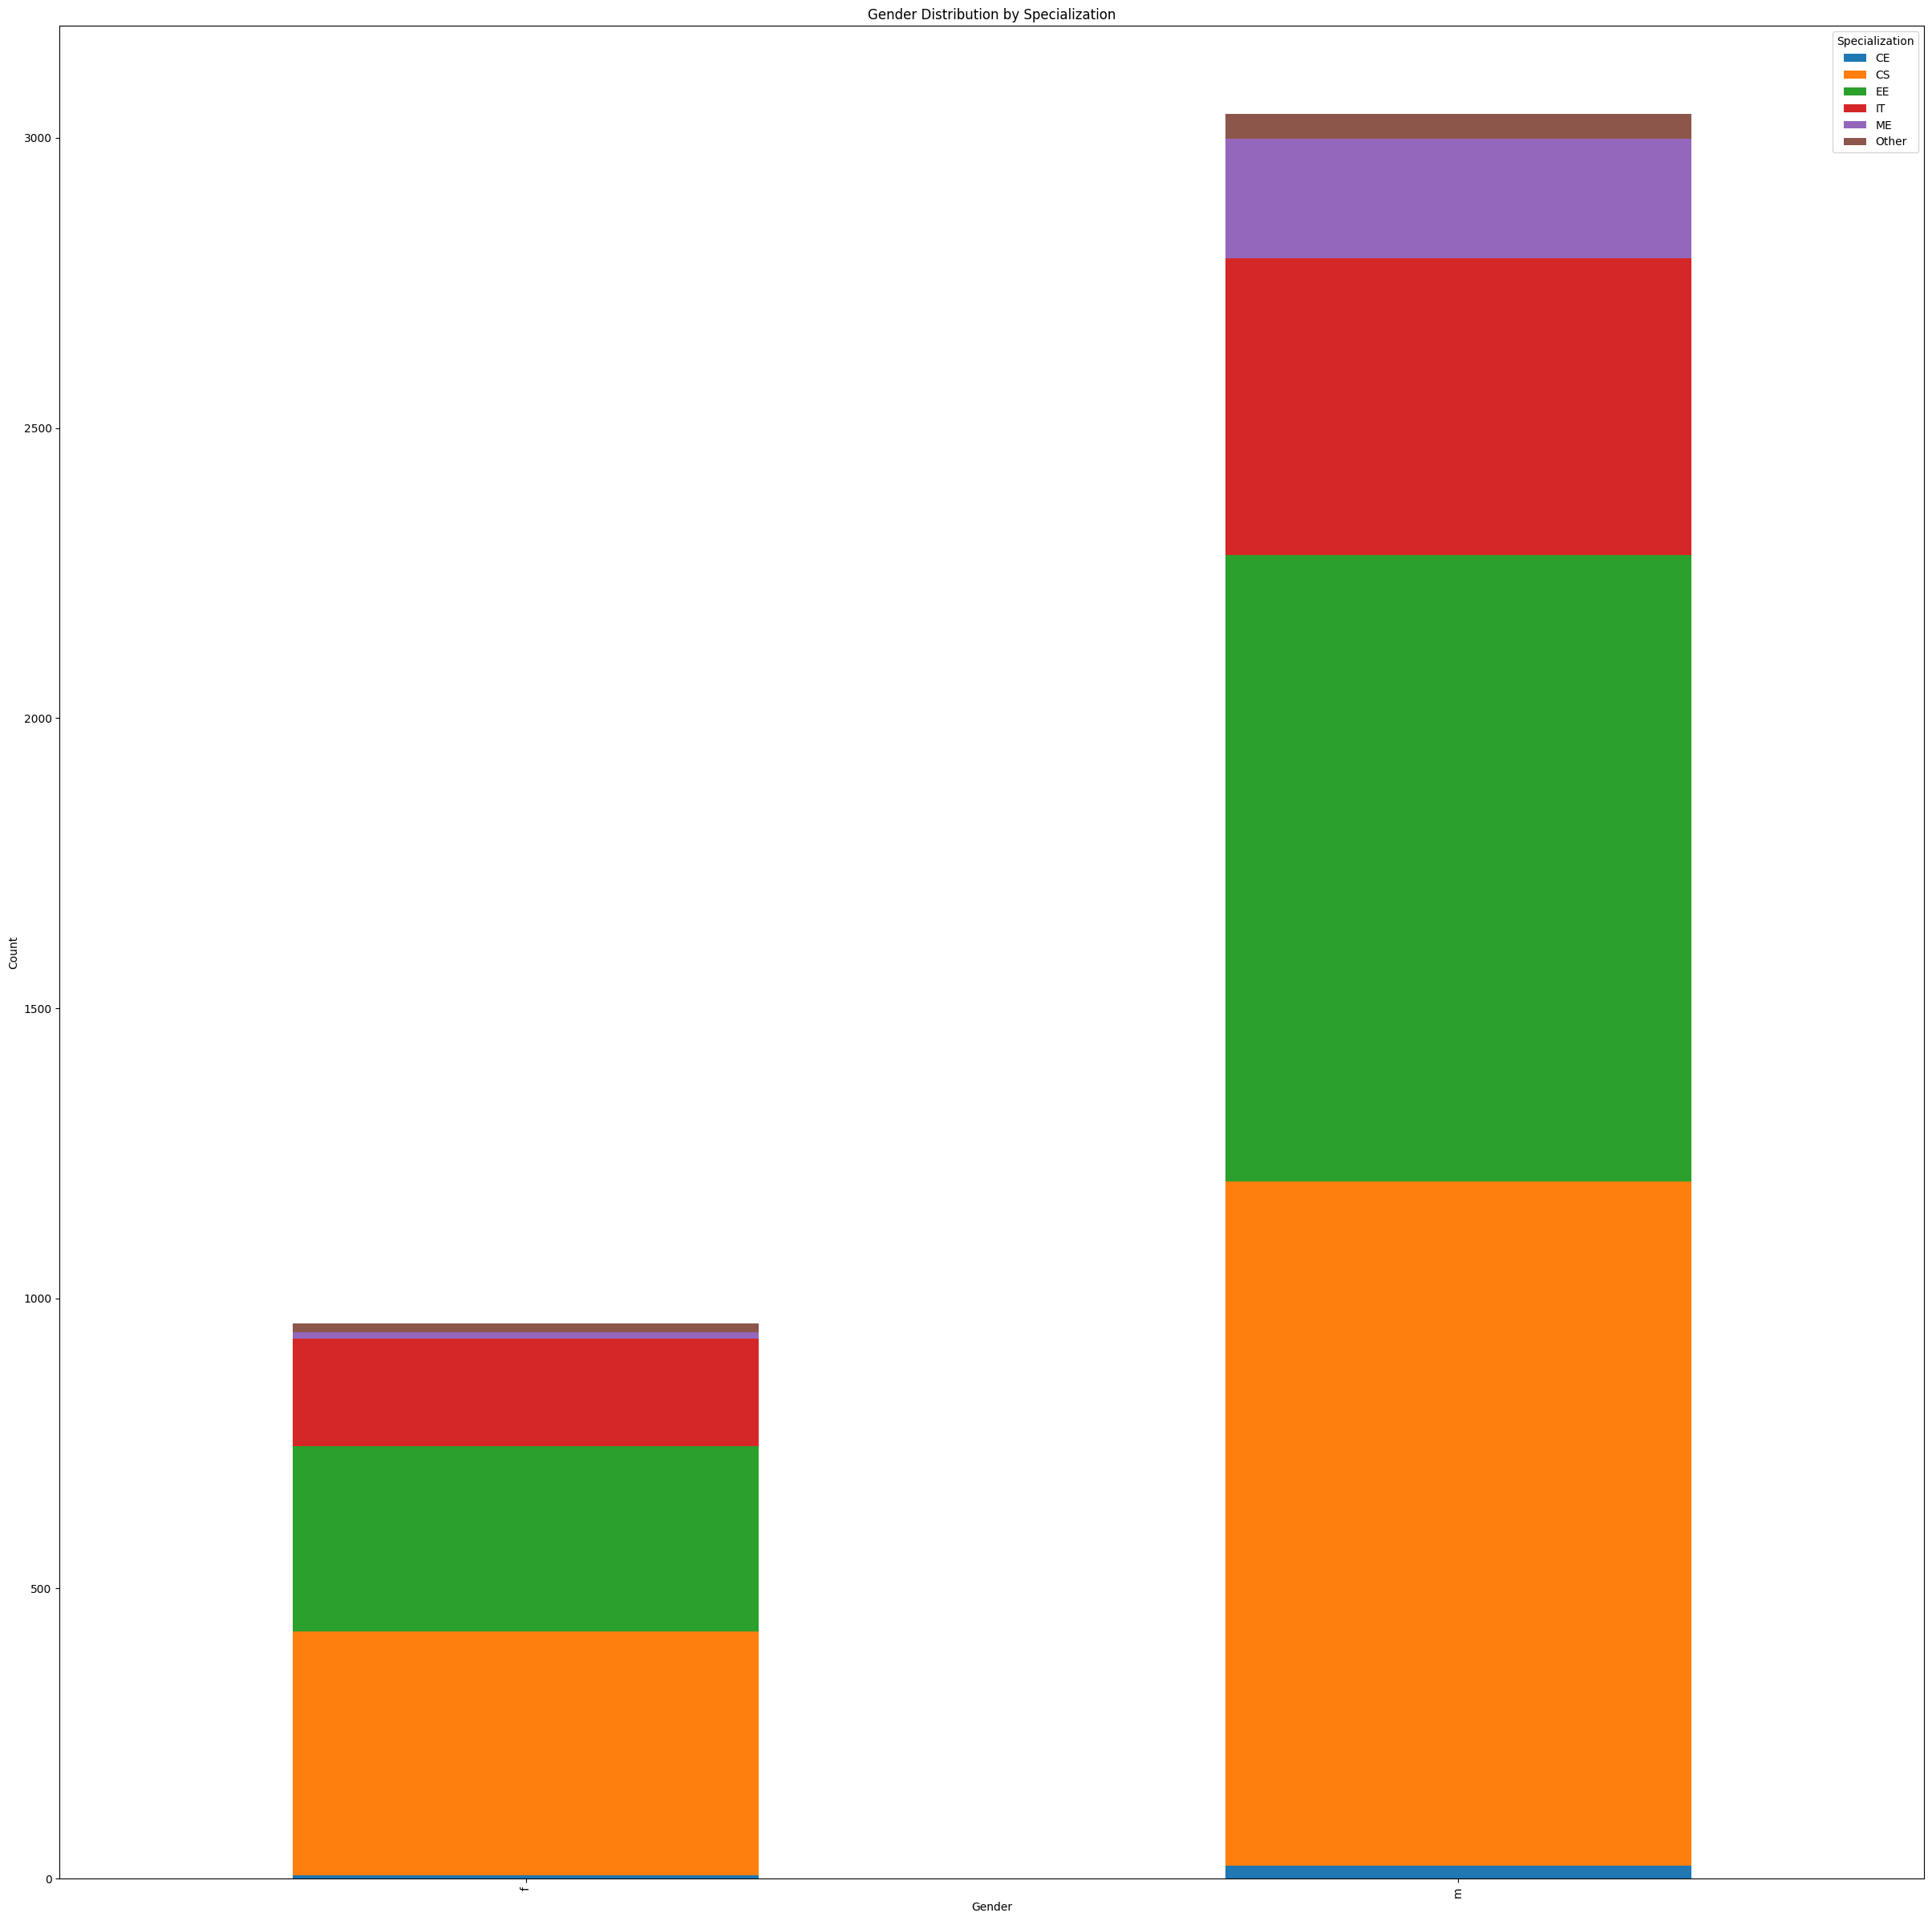

In [86]:
# Visualization (stacked bar chart)
gender_specialization.plot(kind='bar', stacked=True, figsize=(30, 30))
plt.title('Gender Distribution by Specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [87]:
observed = pd.crosstab(df['Gender'], df['Specialization'])
observed

Specialization,CE,CS,EE,IT,ME,Other
Gender,,,,,,
f,6,420,320,184,12,15
m,23,1179,1079,511,207,42


In [88]:
chi2_contingency(observed)

Chi2ContingencyResult(statistic=49.415941726117246, pvalue=1.8246242604380306e-09, dof=5, expected_freq=array([[   6.94172086,  382.75212606,  334.87818909,  166.36193097,
          52.42196098,   13.64407204],
       [  22.05827914, 1216.24787394, 1064.12181091,  528.63806903,
         166.57803902,   43.35592796]]))

In [89]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
degrees_of_freedom = chi2_contingency(observed)[2]

In [90]:
from scipy.stats import chi2
confidence_level = 0.90


degrees_of_freedom = 45

# Calculate the critical value
chi2_critical = chi2.ppf(1 - alpha, degrees_of_freedom)

print(chi2_critical)

61.65623337627955


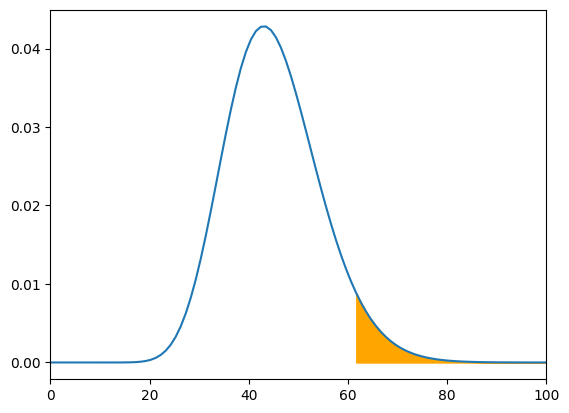

In [91]:
x_min = 0
x_max = 100
df=45

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

In [92]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis


In [93]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


There is a slight relationship between gender and specialization as we can see females mostly prefer CS, EE and IT specializations.

### Conclusions of Hypothesis test:
1. In this case, a higher chi-squared statistic suggests a greater difference between the observed and expected values.
2. We have enough evidence to reject the null hypothesis, and we might conclude that Gender and Specialization are Dependent on Each Other.
3. There is a significant relationship between gender and specialization preference among engineering graduates.

## Final Conclusion of EDA on AMCAT:

1. Most of the aspirants are male from CS and EE department from Tier-1 Colleges and they work in IT domain, mostly in Mumbai and Bangalore cities with an average salary of 3LPA and maximum salary of 40LPA.
2. Most of the female aspirants prefer CS, EE, IT departments rather than mechanical, civil and they also prefer to work in IT domain mostly in Mumbai, Pune cities with an average salary of 2.9LPA and maximum salary around 36–37 LPA.
3. Bangalore is most sought out place for working but most of the students from Tier-1 college work in Greater Noida.
4. Software Engineer and Software developer are the most popular roles among the aspirants whereas senior software engineer and assistant manager roles have the highest salary package.